# G2G Analysis of Organoid SP T cells vs Type 1 Innate T cells in pan fetal reference - DN onwards alignment across different pseudotime estimations (monocle3,  slingshot, palantir, dpt)

In [5]:
import anndata
import numpy as np
import pandas as pd 
import seaborn as sb
import matplotlib.pyplot as plt
import pickle
import os,sys,inspect
import scanpy as sc

# G2G source imports 
import Main
import MyFunctions 
import TimeSeriesPreprocessor
import PathwayAnalyserV2
import VisualUtils
import ClusterUtils
import VisualUtils

import warnings
warnings.filterwarnings("ignore")
import platform
print(platform.python_version())

3.9.16


In [6]:
import scanpy as sc
sc.__version__

'1.9.3'

[1.6558038 1.6558038 1.6558038 ... 0.9572873 0.9572873 0.9572873]
[0.5900355  0.3379185  0.5900355  ... 0.45287    0.25185528 1.0000652 ]
(18436, 17718)
(10089, 17718)


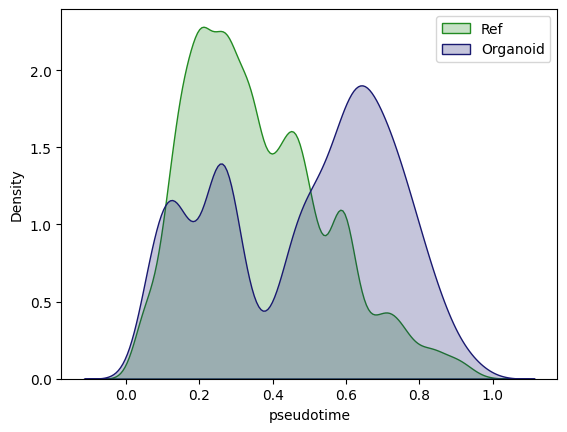

0.0 1.0
0.0 1.0


In [7]:
input_dir ='../GOOGLE_DRIVE_MOUNT/G2G_Analysis/G2G_paper_related/Revision/'
adata_ref = anndata.read_h5ad('revision_data/PanfetalATO_SPT_DNonwards_gplvm_ref_24012023_monocle_slingshot_palantir_dpt.h5ad')
adata_query = anndata.read_h5ad('revision_data/PanfetalATO_SPT_DNonwards_gplvm_ATO_24012023.h5ad_monocle_slingshot_palantir_dpt.h5ad') 

print(adata_ref.X.data)
print(adata_query.X.data)
print(adata_ref.shape)
print(adata_query.shape)
#adata_ref = anndata.read_h5ad('data/adata_ref_spt.h5ad')
#adata_query = anndata.read_h5ad('data/adata_ato_spt.h5ad') 


common_genes = np.intersect1d(adata_ref.var_names, adata_query.var_names)
len(common_genes )
def get_human_TF_list(): 
    # get a human TF list 
    TF_list = pd.read_csv('huamn_TF_list.csv',skiprows=1)
    np.unique(TF_list['Unnamed: 3'], return_counts=True) # There are only 1639 true TFs out of 2765 TFs in this list 
    TF_list = TF_list[TF_list['Unnamed: 3']=='Yes']
    TF_list['Name']
    return TF_list
human_TFs = get_human_TF_list()
human_TFs = np.intersect1d(common_genes , np.asarray(human_TFs['Name']) )
# Examine ref and query pseudotime distributions
sb.kdeplot(adata_ref.obs['time'], fill=True, label='Ref', color='forestgreen') 
sb.kdeplot(adata_query.obs['time'], fill=True, label='Organoid', color='midnightblue'); plt.xlabel('pseudotime'); plt.legend()
plt.show()

print(min(adata_ref.obs['time']), max(adata_ref.obs['time'])) 
print(min(adata_query.obs['time']), max(adata_query.obs['time']))


In [ ]:
TNFa_TFs = np.intersect1d(IGS.SETS['TNF_alpha_signaling_via_NFKB'], human_TFs)

In [ ]:
adata_ref_original = adata_ref.copy()
adata_query_original = adata_query.copy() 

In [ ]:
adata_ref

AnnData object with n_obs × n_vars = 18436 × 17718
    obs: 'ANNOTATION_COMB', 'time', 'bbk', 'n_counts', 'refined_time', 'bin_ids', 'monocle_pseudotime', 'slingshot_pseudotime', 'palantir_pseudotime', 'dpt_pseudotime'
    var: 'n_cells'
    uns: 'ANNOTATION_COMB_colors', 'log1p'
    obsm: 'X_gplvm', 'X_scVI', 'X_umap'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

0.0 19.585997346060378
0.0 252.56997237046625
0.0 1.0
0.0 1.0


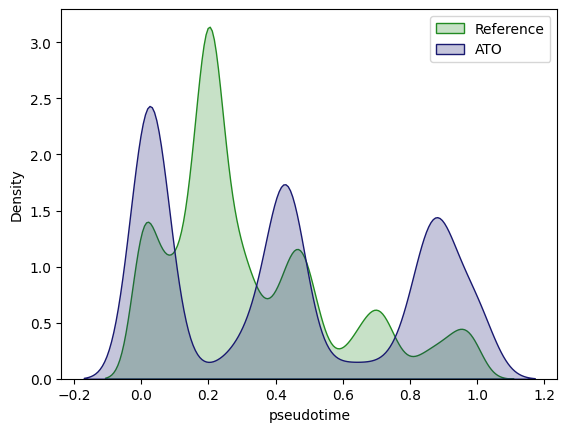

# trying max n points for optimal binning = 14
Optimal equal number of bins for R and Q =  14


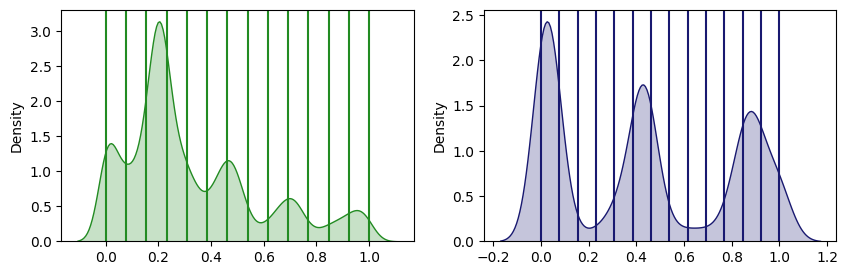

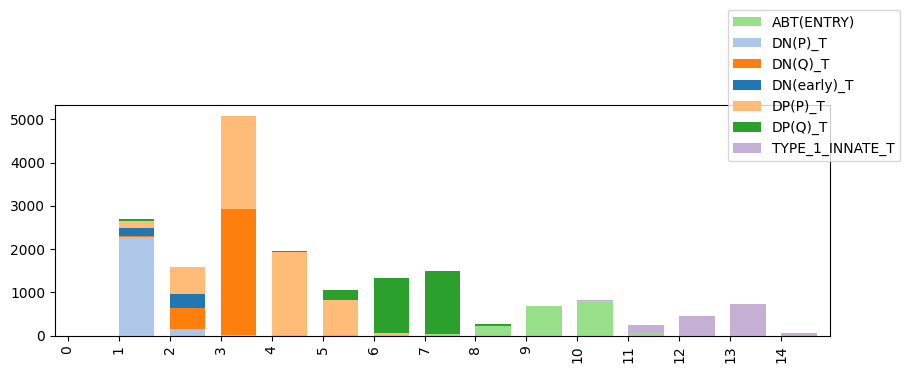

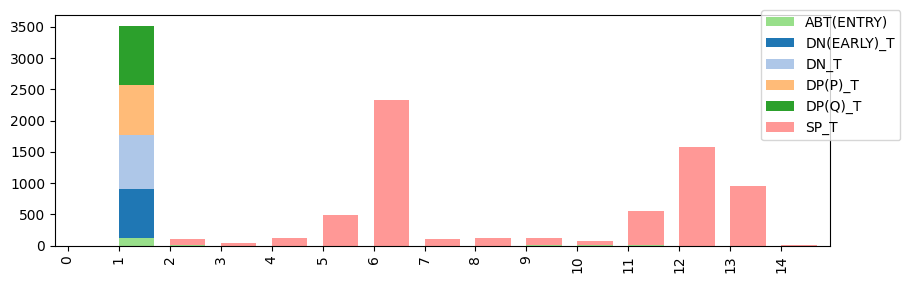

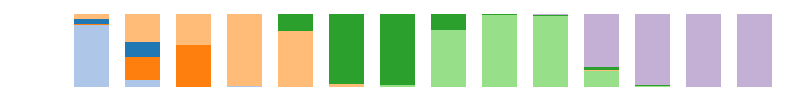

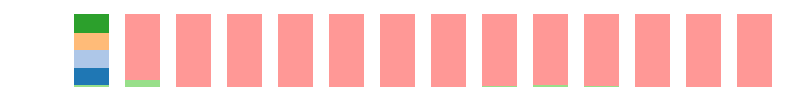

In [ ]:
#adata_ref = adata_ref_original.copy()
#adata_query = adata_query_original.copy() 
                            
adata_ref.obs['time']  = adata_ref.obs['slingshot_pseudotime']
adata_query.obs['time']  = adata_query.obs['slingshot_pseudotime']
#adata_ref.obs['time']  = adata_ref.obs['monocle_pseudotime']
#adata_query.obs['time']  = adata_query.obs['monocle_pseudotime']
#adata_ref.obs['time']  = adata_ref.obs['dpt_pseudotime']
#adata_query.obs['time']  = adata_query.obs['dpt_pseudotime']
#adata_ref.obs['time']  = adata_ref.obs['palantir_pseudotime']
#adata_query.obs['time']  = adata_query.obs['palantir_pseudotime']

print( np.min(adata_ref.obs.time) , np.max(adata_ref.obs.time) ) 
print( np.min(adata_query.obs.time) , np.max(adata_query.obs.time) ) 

adata_ref.obs['time'] = TimeSeriesPreprocessor.Utils.minmax_normalise(np.asarray(adata_ref.obs['time']))
adata_query.obs['time'] = TimeSeriesPreprocessor.Utils.minmax_normalise(np.asarray(adata_query.obs['time']))

print( np.min(adata_ref.obs.time) , np.max(adata_ref.obs.time) ) 
print( np.min(adata_query.obs.time) , np.max(adata_query.obs.time) ) 

# Examine ref and query pseudotime distributions
sb.kdeplot(adata_ref.obs['time'], fill=True, label='Reference', color='forestgreen') 
sb.kdeplot(adata_query.obs['time'], fill=True, label='ATO', color='midnightblue'); plt.xlabel('pseudotime'); plt.legend()
plt.show()

joint_cmap = {'IPSC': '#c7c7c7',
'PRIMITIVE_STREAK': '#9edae5',
'MESODERMAL_PROGENITOR': '#dbdb8d',
'ENDOTHELIUM': '#17becf',
'HSC_MPP': '#f7b6d2',
'HSC_MPP/LMPP_MLP/DC2': '#8c564b',
'LMPP_MLP': '#8c564b',
'CYCLING_MPP': '#e377c2',
'DN(EARLY)_T': '#1f77b4',
'DN(early)_T': '#1f77b4',
'DN_T': '#aec7e8',
'DN(P)_T': '#aec7e8',
'DN(Q)_T': '#ff7f0e',
'DP(P)_T': '#ffbb78',
'DP(Q)_T': '#2ca02c',
'ABT(ENTRY)': '#98df8a',
'SP_T': '#ff9896',
'TYPE_1_INNATE_T': '#c5b0d5'}

# We find 13 to be the size of the optimal binning
vs = VisualUtils.VisualUtils.get_celltype_composition_across_time(adata_ref, adata_query, 
                                                              n_points=14, ANNOTATION_COLNAME='ANNOTATION_COMB', 
                                                              optimal_binning=False,
                                                             ref_cmap=joint_cmap, query_cmap=joint_cmap, plot_celltype_counts=True)
#vs.metaS.apply(lambda x: x*100/sum(x), axis=1).plot(kind='bar',stacked=True,color=joint_cmap, grid = False, legend=False, width=0.7,align='edge',figsize=(10,1))
#plt.axis('off')
#plt.savefig('plots/Fig6/ref_timebins.pdf')
#vs.metaT.apply(lambda x: x*100/sum(x), axis=1).plot(kind='bar',stacked=True,color=joint_cmap, grid = False, legend=False, width=0.7,align='edge',figsize=(10,1))
#plt.axis('off')
#plt.savefig('plots/Fig6/ato_timebins.pdf')

# RUN G2G ALIGNMENT



In [ ]:
gene_list = TNFa_TFs
aligner = Main.RefQueryAligner(adata_ref, adata_query, gene_list, len(vs.optimal_bining_S))
aligner.WEIGHT_BY_CELL_DENSITY = True
aligner.WINDOW_SIZE=0.1
aligner.state_params = [0.99,0.1,0.7]
aligner.optimal_binning = True
aligner.opt_binning_S = vs.optimal_bining_S
aligner.opt_binning_T = vs.optimal_bining_T
aligner.align_all_pairs()
#pickle.dump(aligner, open('../GOOGLE_DRIVE_MOUNT/G2G_Analysis/G2G_paper_related/aligner_TF_SPTDNonwards.pkl', 'wb')) 


WINDOW_SIZE= 0.1


  0%|          | 0/42 [00:00<?, ?it/s]

Average Alignment:  MMIIIDMMMIIIIMMDDDDDD


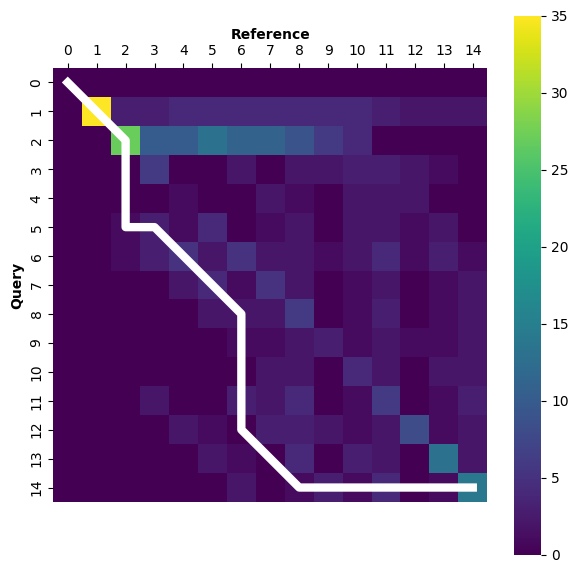

In [ ]:
slingshot_aligner = aligner
slingshot_aligner.get_aggregate_alignment()

Average Alignment:  IIIDDVDMMMIMMMIDIIDDDD


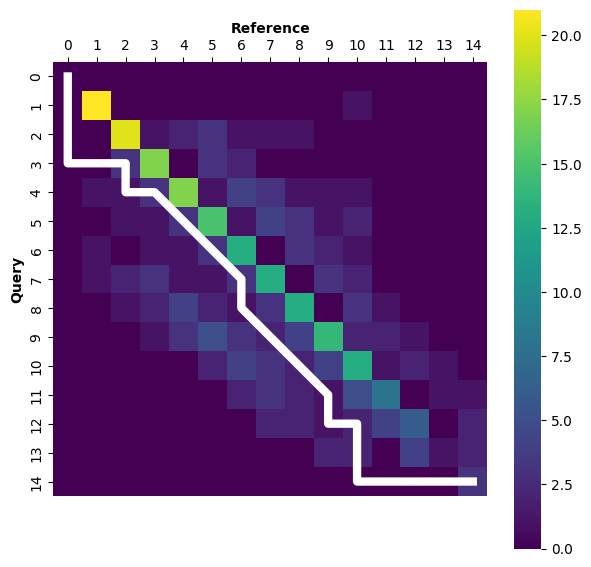

In [28]:
gplvm_aligner = aligner
gplvm_aligner.get_aggregate_alignment()

Average Alignment:  IIIDIDIDIDIIMMMMMMDDDD


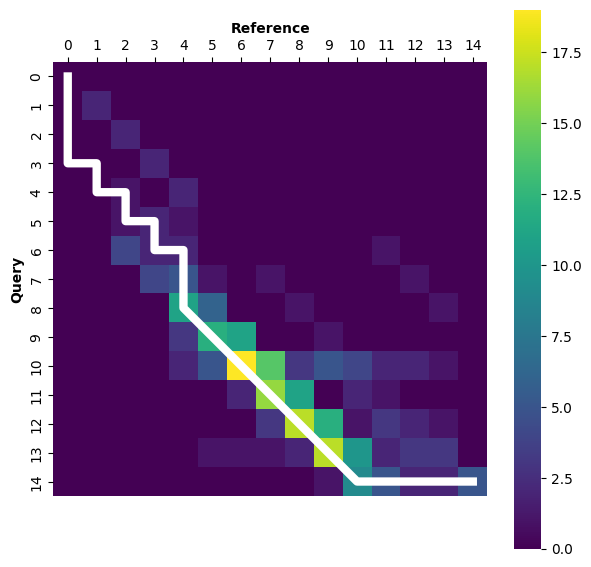

In [24]:
#monocle_aligner = aligner
#palantir_aligner = aligner 
dpt_aligner =aligner
dpt_aligner.get_aggregate_alignment()

Average Alignment:  IIIDIDIDIDIIDMMMMMMDDD


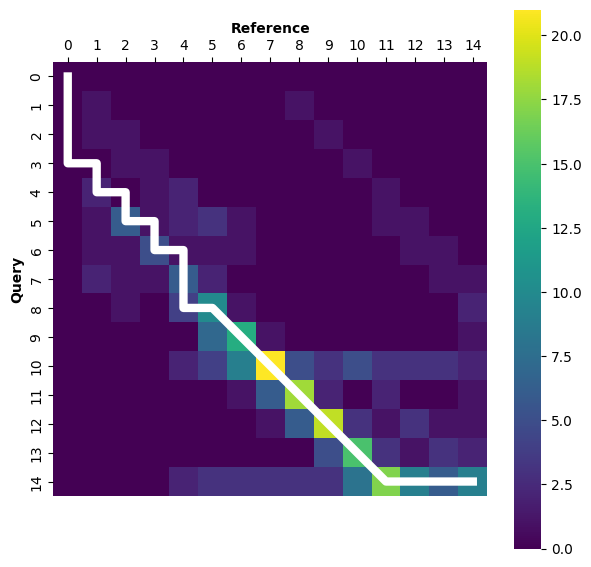

In [21]:
palantir_aligner.get_aggregate_alignment()

Average Alignment:  MIIIDDDMMMIIIMDMMMDD


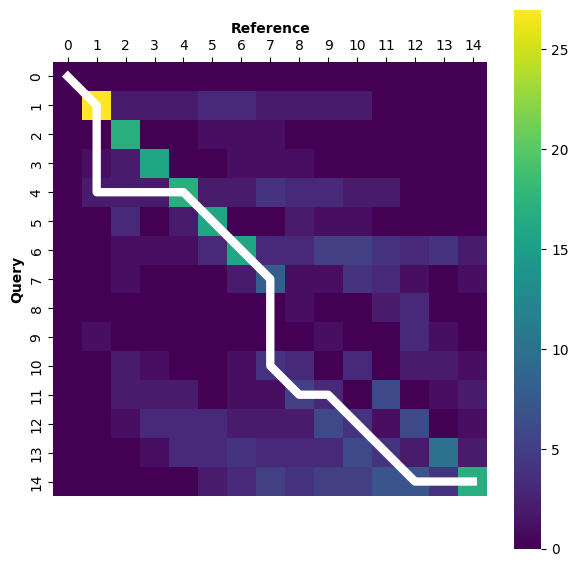

In [17]:
monocle_aligner.get_aggregate_alignment()

Average Alignment:  MMIIIDMMMIIIIMMDDDDDD


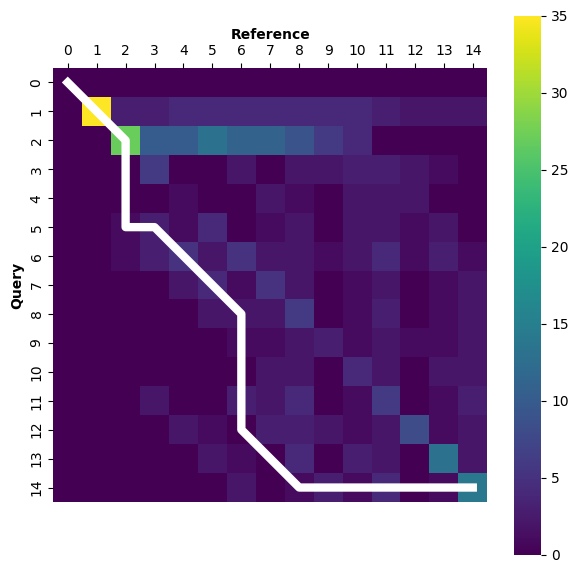

In [11]:
aligner.get_aggregate_alignment()

In [ ]:
#gene = 'BCL6'#'JUN'#'IRF1'#'KLF10'#'NR4A1'# 'KLF9'#'EGR1'#'BCL6' #

#VisualUtils.plotTimeSeries(gene, aligner_slingshot)
#VisualUtils.plotTimeSeries(gene, aligner_monocle)
#VisualUtils.plotTimeSeries(gene, aligner_gplvm)
#VisualUtils.plotTimeSeries(gene, aligner_palantir)
#VisualUtils.plotTimeSeries(gene, aligner_dpt)
#VisualUtils.show_gene_alignment('KLF4', slingshot_aligner,  vs)

In [ ]:
#gplvm_arr = []
#palantir_arr = []
#slingshot_arr = []
#dpt_arr = []
#monocle_arr = []

#for g in TNFa_TFs:
#    gplvm_arr.append(gplvm_aligner.results_map[g].alignment_str)
#    palantir_arr.append(palantir_aligner.results_map[g].alignment_str)
#    slingshot_arr.append(slingshot_aligner.results_map[g].alignment_str)
#    dpt_arr.append(dpt_aligner.results_map[g].alignment_str)
#    monocle_arr.append(monocle_aligner.results_map[g].alignment_str)

In [ ]:
#df = pd.DataFrame([TNFa_TFs, slingshot_arr, monocle_arr, gplvm_arr, palantir_arr, dpt_arr]).transpose() 
#df.columns = ['TF', 'slingshot','monocle','gplvm','palantir','dpt']
#df

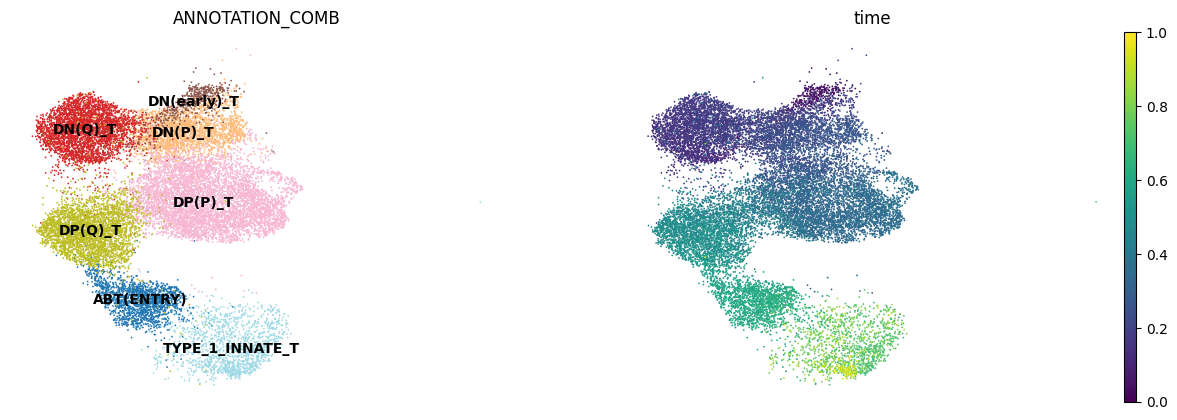

In [63]:
sc.pl.umap(adata_ref, color=['ANNOTATION_COMB','time'], legend_loc='on data', frameon=False)

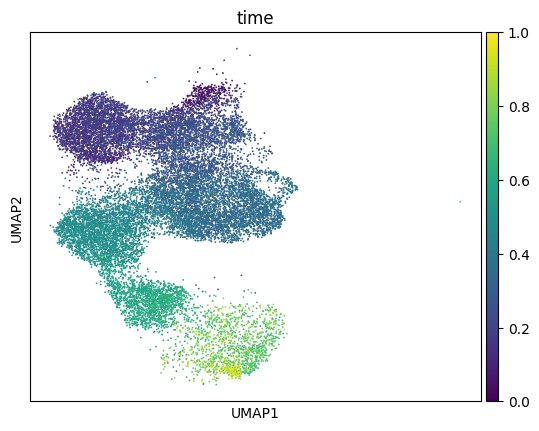

In [64]:
sc.pl.umap(adata_ref, color=['time'], legend_loc='on data')

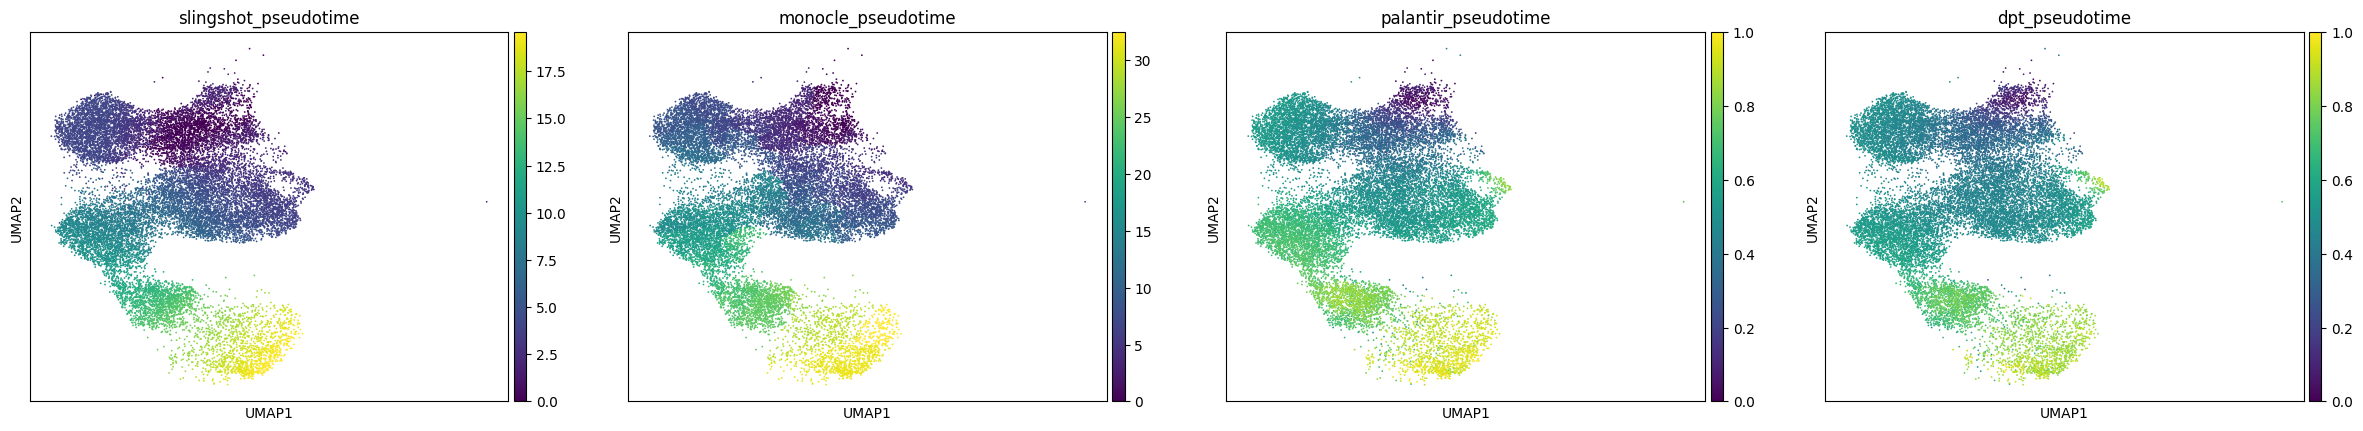

In [60]:
sc.pl.umap(adata_ref, color=['slingshot_pseudotime','monocle_pseudotime','palantir_pseudotime','dpt_pseudotime'], legend_loc='on data')

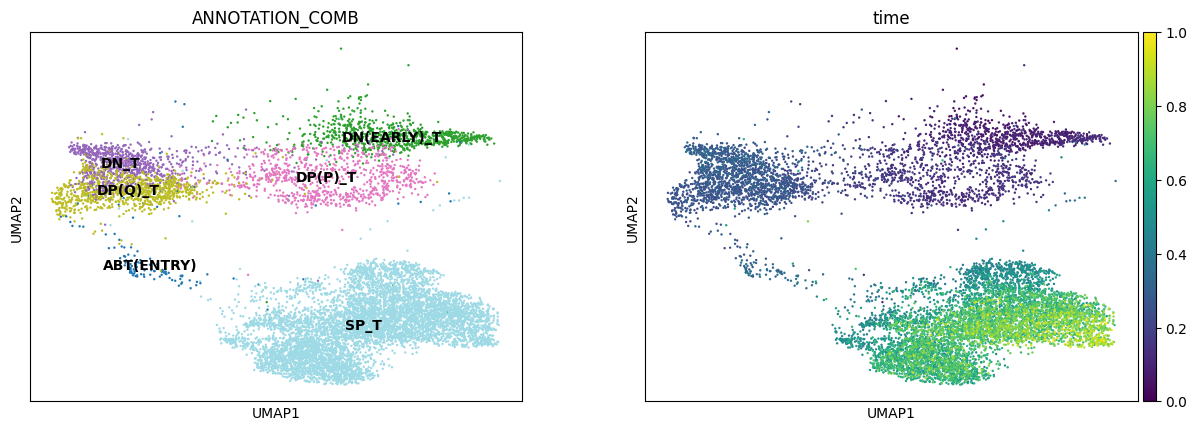

In [61]:
sc.pl.umap(adata_query, color=['ANNOTATION_COMB','time'], legend_loc='on data')

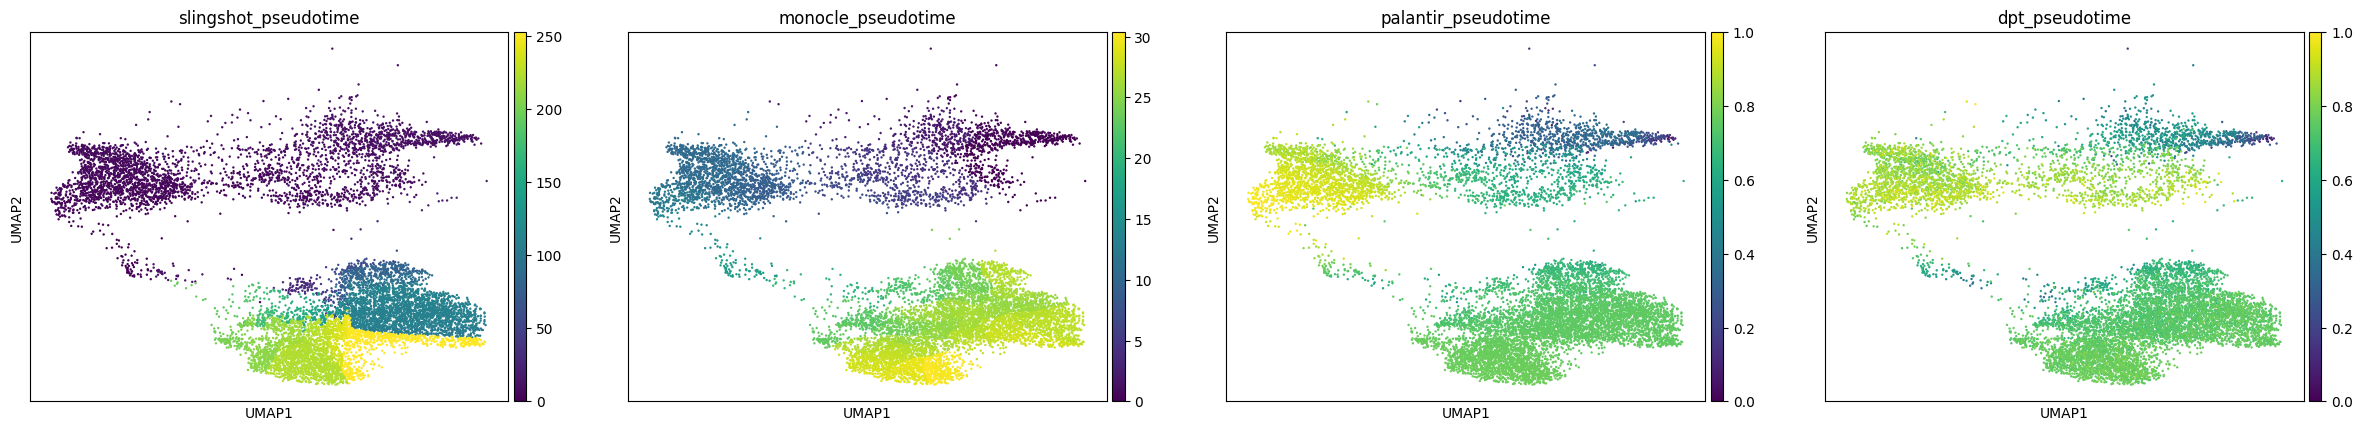

In [62]:
sc.pl.umap(adata_query, color=['slingshot_pseudotime','monocle_pseudotime','palantir_pseudotime','dpt_pseudotime'], legend_loc='on data')

In [ ]:
sc.pl.umap(adata_ref, color=['ANNOTATION_COMB','time','slingshot_pseudotime','monocle_pseudotime','palantir_pseudotime','dpt_pseudotime'], legend_loc='on data')

# All TFs

In [11]:
#input_dir ='../GOOGLE_DRIVE_MOUNT/G2G_Analysis/G2G_paper_related/'
#adata_ref = anndata.read_h5ad(input_dir+'PanfetalATO_SPT_DNonwards_gplvm_ref_24012023_monocle_slingshot.h5ad')
#adata_query = anndata.read_h5ad(input_dir +'PanfetalATO_SPT_DNonwards_gplvm_ATO_24012023.h5ad_monocle_slingshot.h5ad') 

#print(adata_ref.X.data)
#print(adata_query.X.data)
#print(adata_ref.shape)
#print(adata_query.shape)

input_dir ='../GOOGLE_DRIVE_MOUNT/G2G_Analysis/G2G_paper_related/Revision/'
adata_ref = anndata.read_h5ad('revision_data/PanfetalATO_SPT_DNonwards_gplvm_ref_24012023_monocle_slingshot_palantir_dpt.h5ad')
adata_query = anndata.read_h5ad('revision_data/PanfetalATO_SPT_DNonwards_gplvm_ATO_24012023.h5ad_monocle_slingshot_palantir_dpt.h5ad') 

print(adata_ref.X.data)
print(adata_query.X.data)
print(adata_ref.shape)
print(adata_query.shape)


[1.6558038 1.6558038 1.6558038 ... 0.9572873 0.9572873 0.9572873]
[0.5900355  0.3379185  0.5900355  ... 0.45287    0.25185528 1.0000652 ]
(18436, 17718)
(10089, 17718)


In [12]:
np.mean(adata_query.obs.time) #0.48

0.4862739216642682

In [13]:

common_genes = np.intersect1d(adata_ref.var_names, adata_query.var_names)
len(common_genes )
def get_human_TF_list(): 
    # get a human TF list 
    TF_list = pd.read_csv('huamn_TF_list.csv',skiprows=1)
    np.unique(TF_list['Unnamed: 3'], return_counts=True) # There are only 1639 true TFs out of 2765 TFs in this list 
    TF_list = TF_list[TF_list['Unnamed: 3']=='Yes']
    TF_list['Name']
    return TF_list
human_TFs = get_human_TF_list()
human_TFs = np.intersect1d(common_genes , np.asarray(human_TFs['Name']) )

In [14]:
len(human_TFs)

1220

0.0 19.585997346060378
0.0 252.56997237046625
0.0 1.0
0.0 1.0


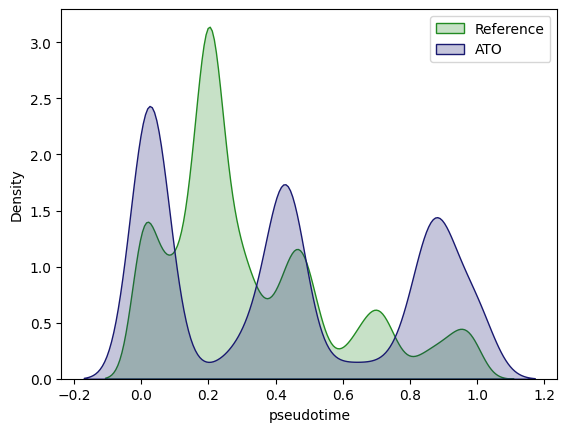

In [15]:
adata_ref.obs['time']  = adata_ref.obs['slingshot_pseudotime']
adata_query.obs['time']  = adata_query.obs['slingshot_pseudotime']

print( np.min(adata_ref.obs.time) , np.max(adata_ref.obs.time) ) 
print( np.min(adata_query.obs.time) , np.max(adata_query.obs.time) ) 

adata_ref.obs['time'] = TimeSeriesPreprocessor.Utils.minmax_normalise(np.asarray(adata_ref.obs['time']))
adata_query.obs['time'] = TimeSeriesPreprocessor.Utils.minmax_normalise(np.asarray(adata_query.obs['time']))

print( np.min(adata_ref.obs.time) , np.max(adata_ref.obs.time) ) 
print( np.min(adata_query.obs.time) , np.max(adata_query.obs.time) ) 


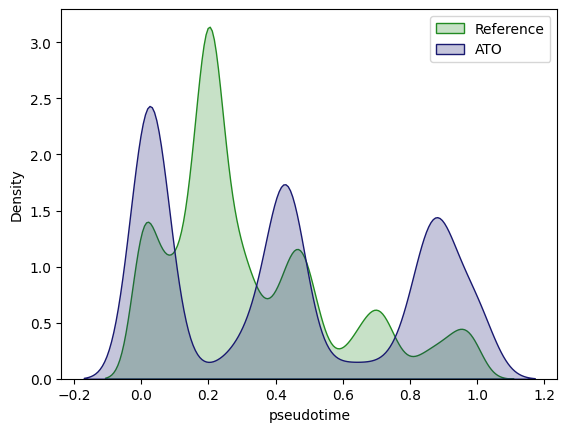

In [16]:
# Examine ref and query pseudotime distributions
sb.kdeplot(adata_ref.obs['time'], fill=True, label='Reference', color='forestgreen') 
sb.kdeplot(adata_query.obs['time'], fill=True, label='ATO', color='midnightblue'); plt.xlabel('pseudotime'); plt.legend()
plt.savefig('revision_figs/refato_different_pseudotime_estimators/slingshot_dists.png')

# trying max n points for optimal binning = 14
Optimal equal number of bins for R and Q =  14


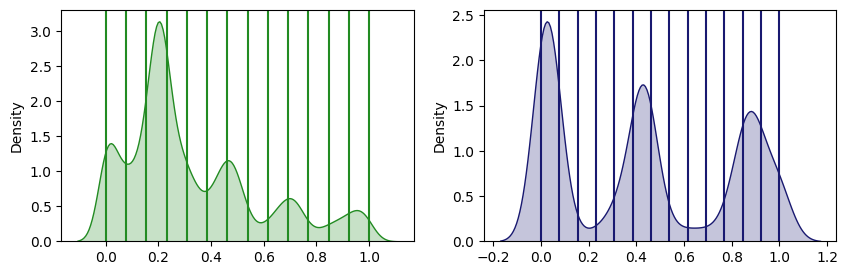

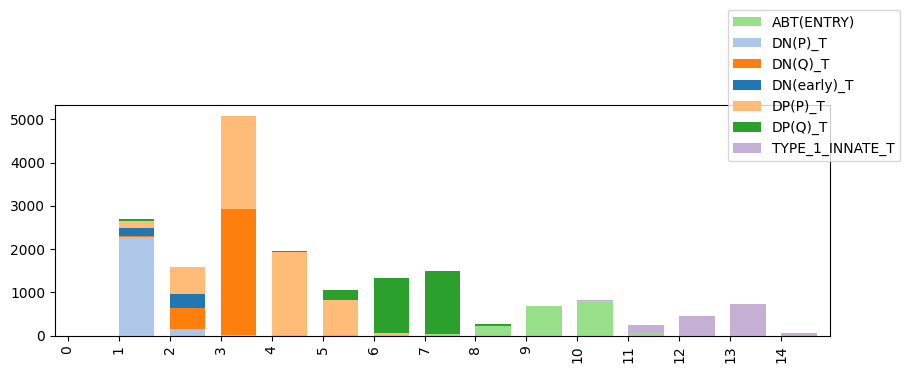

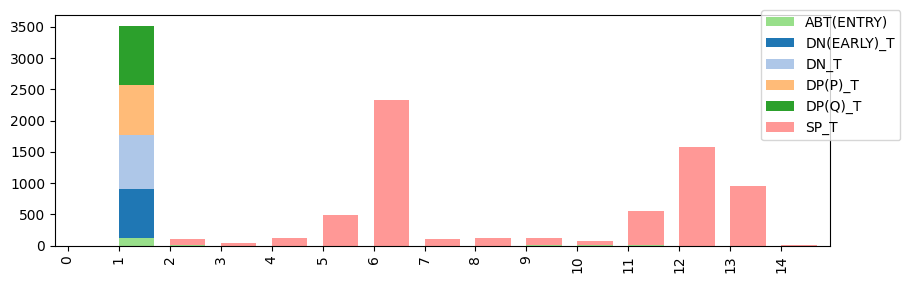

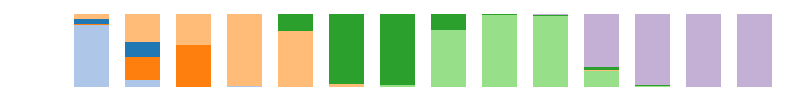

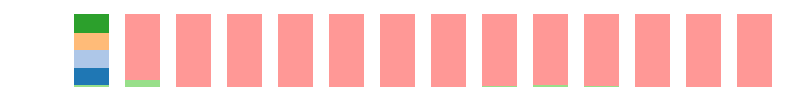

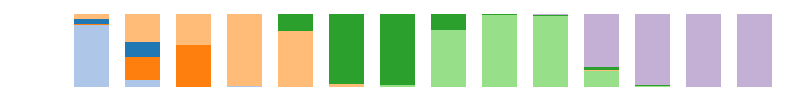

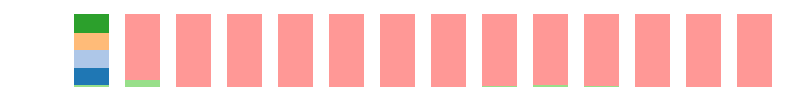

In [18]:

joint_cmap = {'IPSC': '#c7c7c7',
'PRIMITIVE_STREAK': '#9edae5',
'MESODERMAL_PROGENITOR': '#dbdb8d',
'ENDOTHELIUM': '#17becf',
'HSC_MPP': '#f7b6d2',
'HSC_MPP/LMPP_MLP/DC2': '#8c564b',
'LMPP_MLP': '#8c564b',
'CYCLING_MPP': '#e377c2',
'DN(EARLY)_T': '#1f77b4',
'DN(early)_T': '#1f77b4',
'DN_T': '#aec7e8',
'DN(P)_T': '#aec7e8',
'DN(Q)_T': '#ff7f0e',
'DP(P)_T': '#ffbb78',
'DP(Q)_T': '#2ca02c',
'ABT(ENTRY)': '#98df8a',
'SP_T': '#ff9896',
'TYPE_1_INNATE_T': '#c5b0d5'}

# We find 13 to be the size of the optimal binning
vs = VisualUtils.VisualUtils.get_celltype_composition_across_time(adata_ref, adata_query, 
                                                              n_points=14, ANNOTATION_COLNAME='ANNOTATION_COMB', 
                                                              optimal_binning=False,
                                                             ref_cmap=joint_cmap, query_cmap=joint_cmap, plot_celltype_counts=True)
vs.metaS.apply(lambda x: x*100/sum(x), axis=1).plot(kind='bar',stacked=True,color=joint_cmap, grid = False, legend=False, width=0.7,align='edge',figsize=(10,1))
plt.axis('off')
plt.savefig('revision_figs/refato_different_pseudotime_estimators/slingshot_ref_timebins.pdf')
vs.metaT.apply(lambda x: x*100/sum(x), axis=1).plot(kind='bar',stacked=True,color=joint_cmap, grid = False, legend=False, width=0.7,align='edge',figsize=(10,1))
plt.axis('off')
plt.savefig('revision_figs/refato_different_pseudotime_estimators/slingshot_ato_timebins.pdf')



0.0 19.585997346060378
0.0 252.56997237046625
0.0 1.0
0.0 1.0


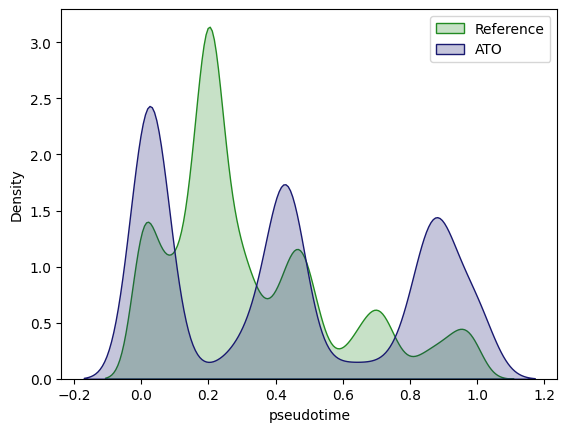

# trying max n points for optimal binning = 14
Optimal equal number of bins for R and Q =  14
WINDOW_SIZE= 0.1


  0%|          | 0/1220 [00:01<?, ?it/s]

Average Alignment:  MMMIDMMMMMMMMMM


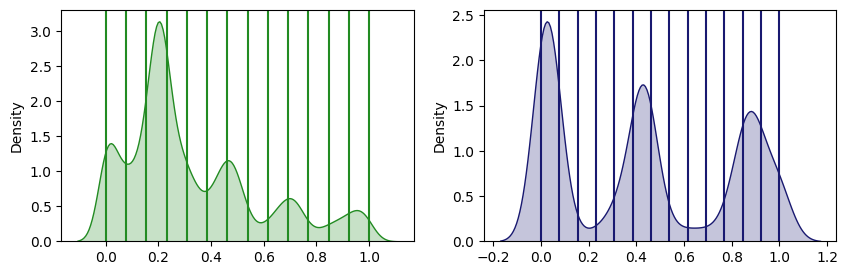

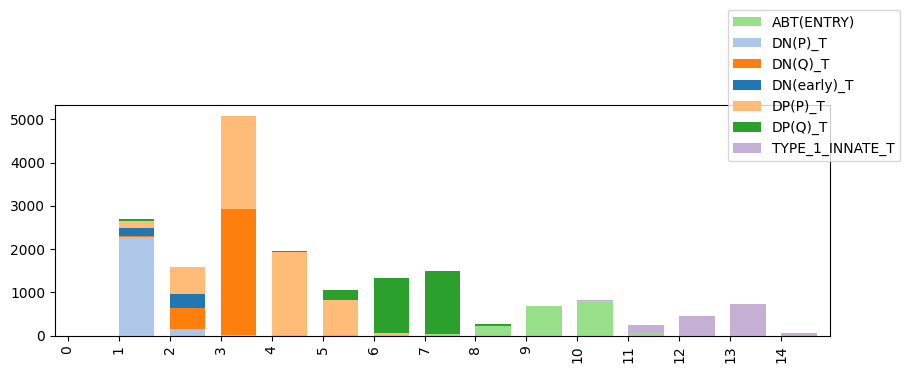

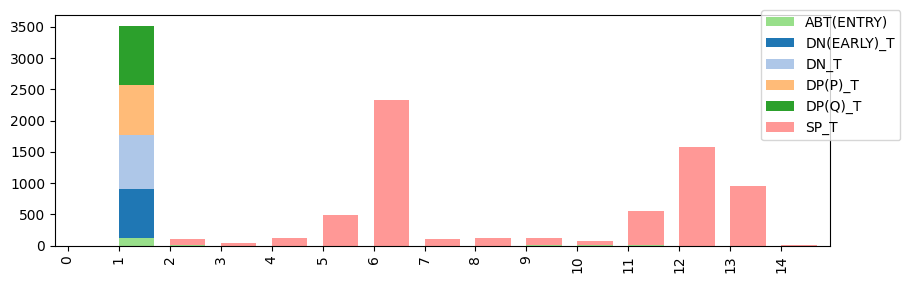

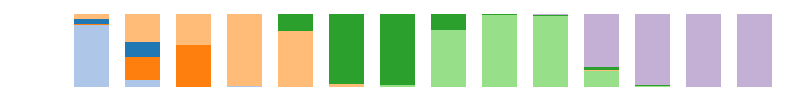

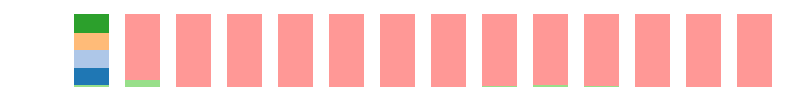

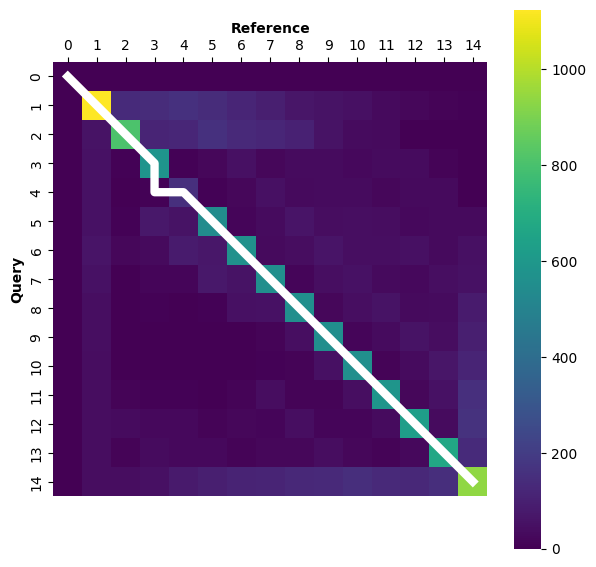

In [68]:
adata_ref.obs['time']  = adata_ref.obs['slingshot_pseudotime']
adata_query.obs['time']  = adata_query.obs['slingshot_pseudotime']

print( np.min(adata_ref.obs.time) , np.max(adata_ref.obs.time) ) 
print( np.min(adata_query.obs.time) , np.max(adata_query.obs.time) ) 

adata_ref.obs['time'] = TimeSeriesPreprocessor.Utils.minmax_normalise(np.asarray(adata_ref.obs['time']))
adata_query.obs['time'] = TimeSeriesPreprocessor.Utils.minmax_normalise(np.asarray(adata_query.obs['time']))

print( np.min(adata_ref.obs.time) , np.max(adata_ref.obs.time) ) 
print( np.min(adata_query.obs.time) , np.max(adata_query.obs.time) ) 

# Examine ref and query pseudotime distributions
sb.kdeplot(adata_ref.obs['time'], fill=True, label='Reference', color='forestgreen') 
sb.kdeplot(adata_query.obs['time'], fill=True, label='ATO', color='midnightblue'); plt.xlabel('pseudotime'); plt.legend()
plt.show()

joint_cmap = {'IPSC': '#c7c7c7',
'PRIMITIVE_STREAK': '#9edae5',
'MESODERMAL_PROGENITOR': '#dbdb8d',
'ENDOTHELIUM': '#17becf',
'HSC_MPP': '#f7b6d2',
'HSC_MPP/LMPP_MLP/DC2': '#8c564b',
'LMPP_MLP': '#8c564b',
'CYCLING_MPP': '#e377c2',
'DN(EARLY)_T': '#1f77b4',
'DN(early)_T': '#1f77b4',
'DN_T': '#aec7e8',
'DN(P)_T': '#aec7e8',
'DN(Q)_T': '#ff7f0e',
'DP(P)_T': '#ffbb78',
'DP(Q)_T': '#2ca02c',
'ABT(ENTRY)': '#98df8a',
'SP_T': '#ff9896',
'TYPE_1_INNATE_T': '#c5b0d5'}

# We find 13 to be the size of the optimal binning
vs = VisualUtils.VisualUtils.get_celltype_composition_across_time(adata_ref, adata_query, 
                                                              n_points=14, ANNOTATION_COLNAME='ANNOTATION_COMB', 
                                                              optimal_binning=False,
                                                             ref_cmap=joint_cmap, query_cmap=joint_cmap, plot_celltype_counts=True)
#vs.metaS.apply(lambda x: x*100/sum(x), axis=1).plot(kind='bar',stacked=True,color=joint_cmap, grid = False, legend=False, width=0.7,align='edge',figsize=(10,1))
#plt.axis('off')
#plt.savefig('plots/Fig6/ref_timebins.pdf')
#vs.metaT.apply(lambda x: x*100/sum(x), axis=1).plot(kind='bar',stacked=True,color=joint_cmap, grid = False, legend=False, width=0.7,align='edge',figsize=(10,1))
#plt.axis('off')
#plt.savefig('plots/Fig6/ato_timebins.pdf')

# RUN G2G ALIGNMENT

gene_list = human_TFs
aligner = Main.RefQueryAligner(adata_ref, adata_query, gene_list, len(vs.optimal_bining_S))
aligner.WEIGHT_BY_CELL_DENSITY = True
aligner.WINDOW_SIZE=0.1
aligner.state_params = [0.99,0.1,0.7]
aligner.optimal_binning = True
aligner.opt_binning_S = vs.optimal_bining_S
aligner.opt_binning_T = vs.optimal_bining_T
aligner.align_all_pairs()
#pickle.dump(aligner, open('../GOOGLE_DRIVE_MOUNT/G2G_Analysis/G2G_paper_related/aligner_TF_SPTDNonwards.pkl', 'wb')) 
aligner.get_aggregate_alignment()

In [70]:
aligner_slingshot = aligner

mean matched percentage: 
76.08 %


Gene_set                              Term Overlap  \
0   MSigDB_Hallmark_2020     TNF-alpha Signaling via NF-kB  16/200   
29       KEGG_2021_Human             TNF signaling pathway   7/112   
30       KEGG_2021_Human        Osteoclast differentiation   7/127   
32       KEGG_2021_Human           IL-17 signaling pathway    6/94   
31       KEGG_2021_Human                 Cocaine addiction    5/49   
..                   ...                               ...     ...   
88       KEGG_2021_Human                     Legionellosis    2/57   
89       KEGG_2021_Human                  Cushing syndrome   3/155   
90       KEGG_2021_Human                       Hepatitis C   3/157   
91       KEGG_2021_Human     Cytosolic DNA-sensing pathway    2/63   
92       KEGG_2021_Human  Cortisol synthesis and secretion    2/65   

         P-value  Adjusted P-value  Old P-value  Old Adjusted P-value  \
0   3.487008e-17      1.011232e-15            0                     0   
29  2.272363e-07      2.840453e-05            0                     0   
30  5.356433e-07      3.347771e-05            0                     0   
32  1.538540e-06      4.807938e-05            0                     0   
31  1.160213e-06      4.807938e-05            0                     0   
..           ...               ...          ...                   ...   
88  1.987498e-02      4.140622e-02            0                     0   
89  2.125901e-02      4.356355e-02            0                     0   
90  2.198011e-02      4.431474e-02            0                     0   
91  2.396862e-02      4.755679e-02            0                     0   
92  2.540362e-02      4.961644e-02            0                     0   

    Odds Ratio  Combined Score  \
0    28.608696     1084.123734   
29   19.148792      292.924351   
30   16.742512      241.758482   
32   19.320779      258.602380   
31   31.818182      434.856140   
..         ...             ...   
88    9.763636       38.256792   
89    5.345710       20.586193   
90    5.275752       20.140800   
91    8.800620       32.835200   
92    8.520378       31.294185   

                                                Genes  \
0   EGR1;JUN;CEBPB;TSC22D1;CEBPD;FOS;RELA;NFKB1;KL...   
29                JUN;CEBPB;ATF6B;FOS;JUNB;RELA;NFKB1   
30                  JUN;FOSB;MITF;FOS;JUNB;RELA;NFKB1   
32                      JUN;CEBPB;FOSB;FOS;RELA;NFKB1   
31                          JUN;ATF6B;FOSB;RELA;NFKB1   
..                                                ...   
88                                         RELA;NFKB1   
89                                   NR4A1;ATF6B;E2F1   
90                                    E2F1;RELA;NFKB1   
91                                         RELA;NFKB1   
92                                        NR4A1;ATF6B   

    -log10 Adjusted P-value  -log10 FDR q-val  
0                 14.995149         14.995149  
29                 4.546612          4.546612  
30                 4.475244          4.475244  
32                 4.318041          4.318041  
31                 4.318041          4.318041  
..                      ...               ...  
88                 1.382934          1.382934  
89                 1.360877          1.360877  
90                 1.353452          1.353452  
91                 1.322787          1.322787  
92                 1.304374          1.304374  

[71 rows x 12 columns]

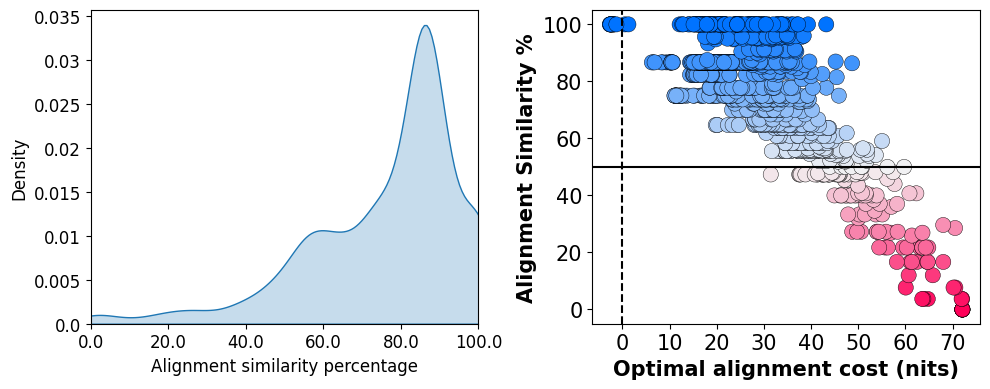

In [71]:
df = aligner_slingshot.get_stat_df() 
# selecting reasonable thresholds by manual inspection to identify top/highly distant genes
# this call might sometime gives 'error sending list' from GSEAPy package function call -
#topDEgenes = df[np.logical_and(list(df['opt_alignment_cost'] >=50), list(df['alignment_similarity_percentage'] <=0.5))]['Gene']
topDEgenes = df[list(df['alignment_similarity_percentage'] <=0.4)]['Gene']
pathway_df = PathwayAnalyserV2.run_overrepresentation_analysis(topDEgenes) # this is a wrapper function call for GSEAPy enrichr inferface
pathway_df

In [19]:
adata_ref.obs['time']  = adata_ref.obs['monocle_pseudotime']
adata_query.obs['time']  = adata_query.obs['monocle_pseudotime']

print( np.min(adata_ref.obs.time) , np.max(adata_ref.obs.time) ) 
print( np.min(adata_query.obs.time) , np.max(adata_query.obs.time) ) 

adata_ref.obs['time'] = TimeSeriesPreprocessor.Utils.minmax_normalise(np.asarray(adata_ref.obs['time']))
adata_query.obs['time'] = TimeSeriesPreprocessor.Utils.minmax_normalise(np.asarray(adata_query.obs['time']))

print( np.min(adata_ref.obs.time) , np.max(adata_ref.obs.time) ) 
print( np.min(adata_query.obs.time) , np.max(adata_query.obs.time) ) 

0.0 32.463157759512384
0.0 30.39397390003688
0.0 1.0
0.0 1.0


# trying max n points for optimal binning = 14
Optimal equal number of bins for R and Q =  14


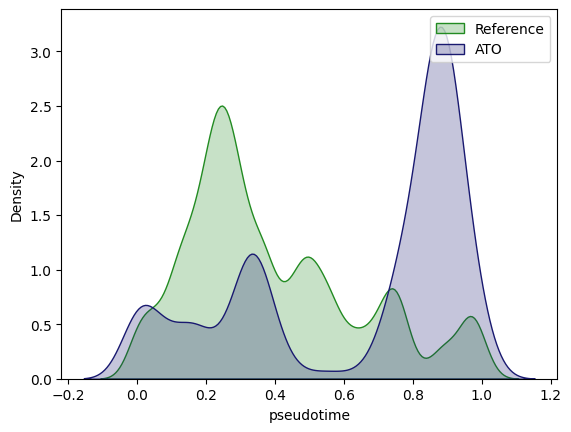

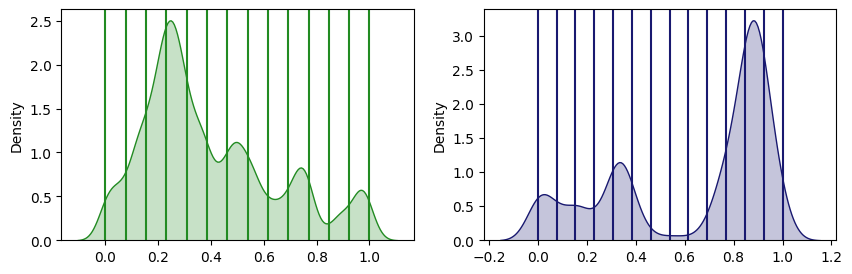

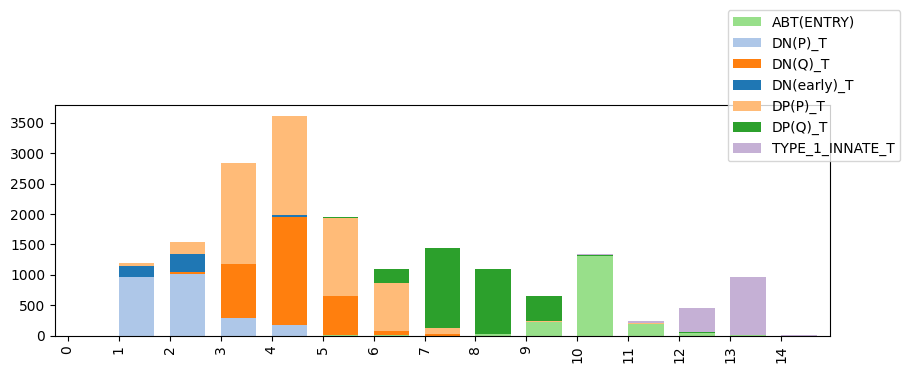

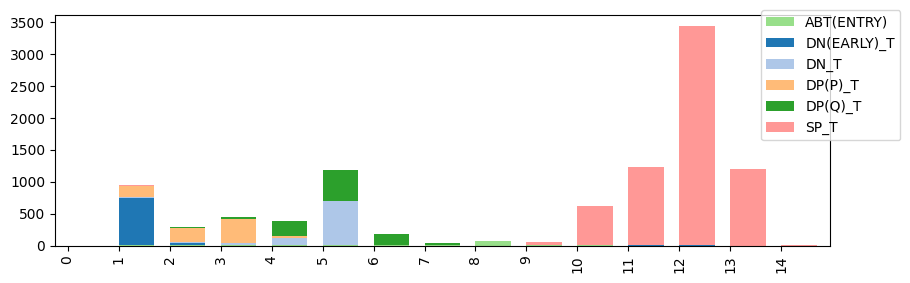

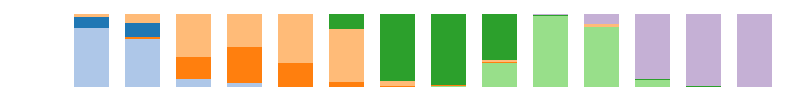

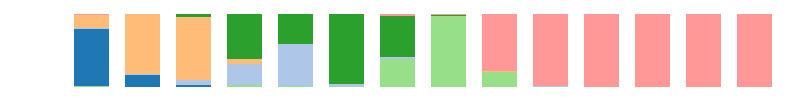

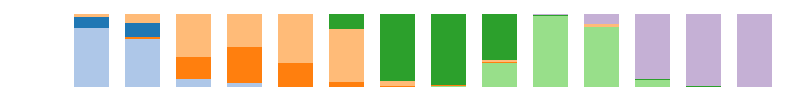

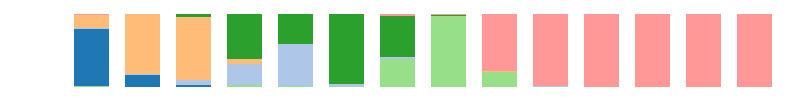

In [20]:
# Examine ref and query pseudotime distributions
sb.kdeplot(adata_ref.obs['time'], fill=True, label='Reference', color='forestgreen') 
sb.kdeplot(adata_query.obs['time'], fill=True, label='ATO', color='midnightblue'); plt.xlabel('pseudotime'); plt.legend()
plt.savefig('revision_figs/refato_different_pseudotime_estimators/monocle_dists.png')


joint_cmap = {'IPSC': '#c7c7c7',
'PRIMITIVE_STREAK': '#9edae5',
'MESODERMAL_PROGENITOR': '#dbdb8d',
'ENDOTHELIUM': '#17becf',
'HSC_MPP': '#f7b6d2',
'HSC_MPP/LMPP_MLP/DC2': '#8c564b',
'LMPP_MLP': '#8c564b',
'CYCLING_MPP': '#e377c2',
'DN(EARLY)_T': '#1f77b4',
'DN(early)_T': '#1f77b4',
'DN_T': '#aec7e8',
'DN(P)_T': '#aec7e8',
'DN(Q)_T': '#ff7f0e',
'DP(P)_T': '#ffbb78',
'DP(Q)_T': '#2ca02c',
'ABT(ENTRY)': '#98df8a',
'SP_T': '#ff9896',
'TYPE_1_INNATE_T': '#c5b0d5'}

# We find 13 to be the size of the optimal binning
vs = VisualUtils.VisualUtils.get_celltype_composition_across_time(adata_ref, adata_query, 
                                                              n_points=14, ANNOTATION_COLNAME='ANNOTATION_COMB', 
                                                              optimal_binning=False,
                                                             ref_cmap=joint_cmap, query_cmap=joint_cmap, plot_celltype_counts=True)
vs.metaS.apply(lambda x: x*100/sum(x), axis=1).plot(kind='bar',stacked=True,color=joint_cmap, grid = False, legend=False, width=0.7,align='edge',figsize=(10,1))
plt.axis('off')
plt.savefig('revision_figs/refato_different_pseudotime_estimators/monocle_ref_timebins.pdf')
vs.metaT.apply(lambda x: x*100/sum(x), axis=1).plot(kind='bar',stacked=True,color=joint_cmap, grid = False, legend=False, width=0.7,align='edge',figsize=(10,1))
plt.axis('off')
plt.savefig('revision_figs/refato_different_pseudotime_estimators/monocle_ato_timebins.pdf')



0.0 32.463157759512384
0.0 30.39397390003688
0.0 1.0
0.0 1.0


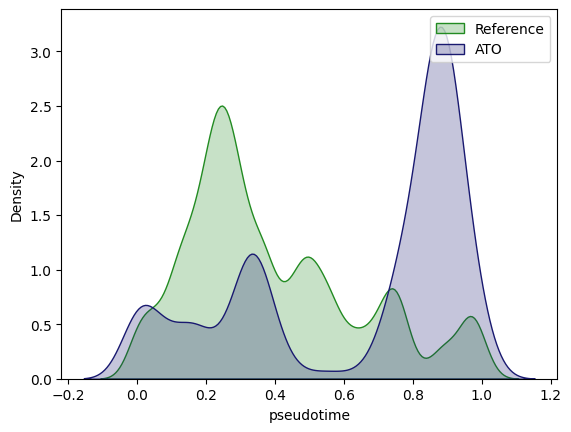

# trying max n points for optimal binning = 14
Optimal equal number of bins for R and Q =  14
WINDOW_SIZE= 0.1


  0%|          | 0/1220 [00:00<?, ?it/s]

Average Alignment:  MMMMMMMIIMMMMMWW


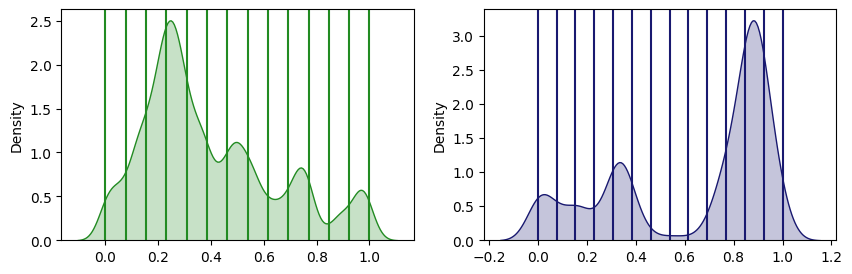

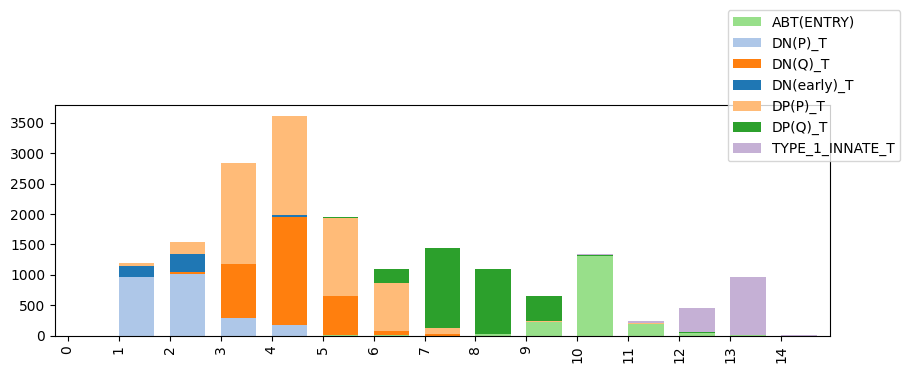

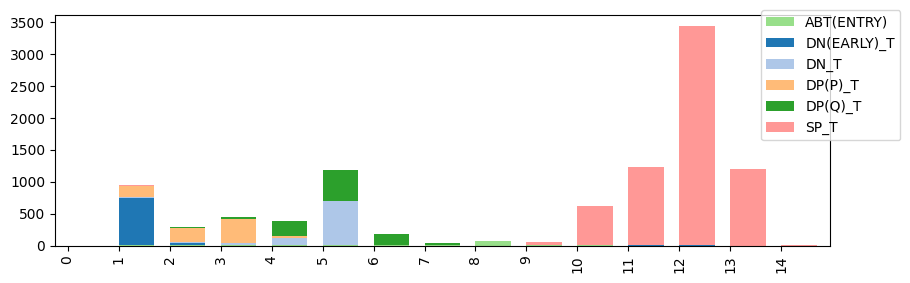

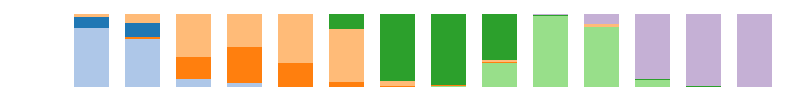

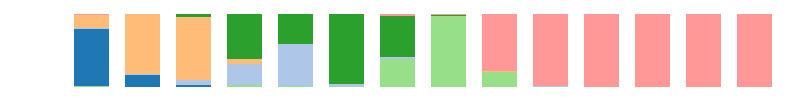

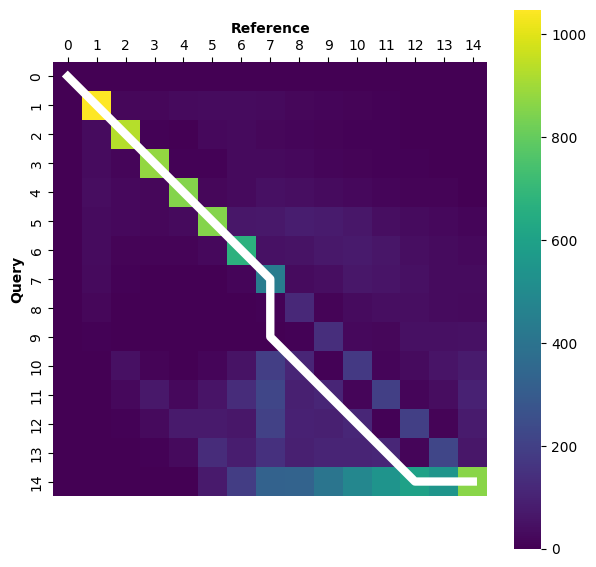

In [72]:
adata_ref.obs['time']  = adata_ref.obs['monocle_pseudotime']
adata_query.obs['time']  = adata_query.obs['monocle_pseudotime']

print( np.min(adata_ref.obs.time) , np.max(adata_ref.obs.time) ) 
print( np.min(adata_query.obs.time) , np.max(adata_query.obs.time) ) 

adata_ref.obs['time'] = TimeSeriesPreprocessor.Utils.minmax_normalise(np.asarray(adata_ref.obs['time']))
adata_query.obs['time'] = TimeSeriesPreprocessor.Utils.minmax_normalise(np.asarray(adata_query.obs['time']))

print( np.min(adata_ref.obs.time) , np.max(adata_ref.obs.time) ) 
print( np.min(adata_query.obs.time) , np.max(adata_query.obs.time) ) 

# Examine ref and query pseudotime distributions
sb.kdeplot(adata_ref.obs['time'], fill=True, label='Reference', color='forestgreen') 
sb.kdeplot(adata_query.obs['time'], fill=True, label='ATO', color='midnightblue'); plt.xlabel('pseudotime'); plt.legend()
plt.show()

joint_cmap = {'IPSC': '#c7c7c7',
'PRIMITIVE_STREAK': '#9edae5',
'MESODERMAL_PROGENITOR': '#dbdb8d',
'ENDOTHELIUM': '#17becf',
'HSC_MPP': '#f7b6d2',
'HSC_MPP/LMPP_MLP/DC2': '#8c564b',
'LMPP_MLP': '#8c564b',
'CYCLING_MPP': '#e377c2',
'DN(EARLY)_T': '#1f77b4',
'DN(early)_T': '#1f77b4',
'DN_T': '#aec7e8',
'DN(P)_T': '#aec7e8',
'DN(Q)_T': '#ff7f0e',
'DP(P)_T': '#ffbb78',
'DP(Q)_T': '#2ca02c',
'ABT(ENTRY)': '#98df8a',
'SP_T': '#ff9896',
'TYPE_1_INNATE_T': '#c5b0d5'}

# We find 13 to be the size of the optimal binning
vs = VisualUtils.VisualUtils.get_celltype_composition_across_time(adata_ref, adata_query, 
                                                              n_points=14, ANNOTATION_COLNAME='ANNOTATION_COMB', 
                                                              optimal_binning=False,
                                                             ref_cmap=joint_cmap, query_cmap=joint_cmap, plot_celltype_counts=True)
#vs.metaS.apply(lambda x: x*100/sum(x), axis=1).plot(kind='bar',stacked=True,color=joint_cmap, grid = False, legend=False, width=0.7,align='edge',figsize=(10,1))
#plt.axis('off')
#plt.savefig('plots/Fig6/ref_timebins.pdf')
#vs.metaT.apply(lambda x: x*100/sum(x), axis=1).plot(kind='bar',stacked=True,color=joint_cmap, grid = False, legend=False, width=0.7,align='edge',figsize=(10,1))
#plt.axis('off')
#plt.savefig('plots/Fig6/ato_timebins.pdf')

# RUN G2G ALIGNMENT

gene_list = human_TFs
aligner = Main.RefQueryAligner(adata_ref, adata_query, gene_list, len(vs.optimal_bining_S))
aligner.WEIGHT_BY_CELL_DENSITY = True
aligner.WINDOW_SIZE=0.1
aligner.state_params = [0.99,0.1,0.7]
aligner.optimal_binning = True
aligner.opt_binning_S = vs.optimal_bining_S
aligner.opt_binning_T = vs.optimal_bining_T
aligner.align_all_pairs()
#pickle.dump(aligner, open('../GOOGLE_DRIVE_MOUNT/G2G_Analysis/G2G_paper_related/aligner_TF_SPTDNonwards.pkl', 'wb')) 
aligner.get_aggregate_alignment()

In [73]:
aligner_monocle = aligner

mean matched percentage: 
73.00999999999999 %


Gene_set                                               Term  \
0   MSigDB_Hallmark_2020                      TNF-alpha Signaling via NF-kB   
1   MSigDB_Hallmark_2020                                        p53 Pathway   
2   MSigDB_Hallmark_2020                                  KRAS Signaling Up   
3   MSigDB_Hallmark_2020                                     UV Response Up   
32       KEGG_2021_Human  Parathyroid hormone synthesis, secretion and a...   
33       KEGG_2021_Human            Transcriptional misregulation in cancer   
34       KEGG_2021_Human                         Osteoclast differentiation   
35       KEGG_2021_Human                                          Mitophagy   
36       KEGG_2021_Human                              Amphetamine addiction   
37       KEGG_2021_Human            Human T-cell leukemia virus 1 infection   
38       KEGG_2021_Human                                      Breast cancer   
39       KEGG_2021_Human                            Chemical carcinogenesis   
40       KEGG_2021_Human                                        Hepatitis B   
4   MSigDB_Hallmark_2020                                            Hypoxia   
41       KEGG_2021_Human                                 Pathways in cancer   
42       KEGG_2021_Human                              TNF signaling pathway   
43       KEGG_2021_Human                                  Cocaine addiction   
44       KEGG_2021_Human                                          Apoptosis   
45       KEGG_2021_Human                         Inflammatory bowel disease   
46       KEGG_2021_Human                  Non-alcoholic fatty liver disease   
47       KEGG_2021_Human                             MAPK signaling pathway   
48       KEGG_2021_Human                   Th1 and Th2 cell differentiation   
49       KEGG_2021_Human                             GnRH signaling pathway   
50       KEGG_2021_Human                            IL-17 signaling pathway   
51       KEGG_2021_Human                                    Prostate cancer   
52       KEGG_2021_Human                Aldosterone synthesis and secretion   
53       KEGG_2021_Human                          Th17 cell differentiation   
54       KEGG_2021_Human                          Lipid and atherosclerosis   
55       KEGG_2021_Human                   Herpes simplex virus 1 infection   
56       KEGG_2021_Human     Growth hormone synthesis, secretion and action   
5   MSigDB_Hallmark_2020                          Unfolded Protein Response   
57       KEGG_2021_Human                          Relaxin signaling pathway   
58       KEGG_2021_Human                         Estrogen signaling pathway   

   Overlap       P-value  Adjusted P-value  Old P-value  Old Adjusted P-value  \
0   14/200  3.884307e-15      1.242978e-13            0                     0   
1    7/200  4.712502e-06      7.540003e-05            0                     0   
2    6/200  5.574513e-05      5.946147e-04            0                     0   
3    5/158  1.879223e-04      1.503378e-03            0                     0   
32   5/106  2.828641e-05      1.687598e-03            0                     0   
33   6/192  4.441433e-05      1.687598e-03            0                     0   
34   5/127  6.722318e-05      1.687598e-03            0                     0   
35    4/68  7.971348e-05      1.687598e-03            0                     0   
36    4/69  8.440658e-05      1.687598e-03            0                     0   
37   6/219  9.205079e-05      1.687598e-03            0                     0   
38   5/147  1.341148e-04      2.041347e-03            0                     0   
39   6/239  1.484616e-04      2.041347e-03            0                     0   
40   5/162  2.111008e-04      2.580121e-03            0                     0   
4    5/200  5.556718e-04      3.556299e-03            0                     0   
41   8/531  3.859449e-04      4.245393e-03            0                     0   
42   4/112  5.443886e-04      5.4

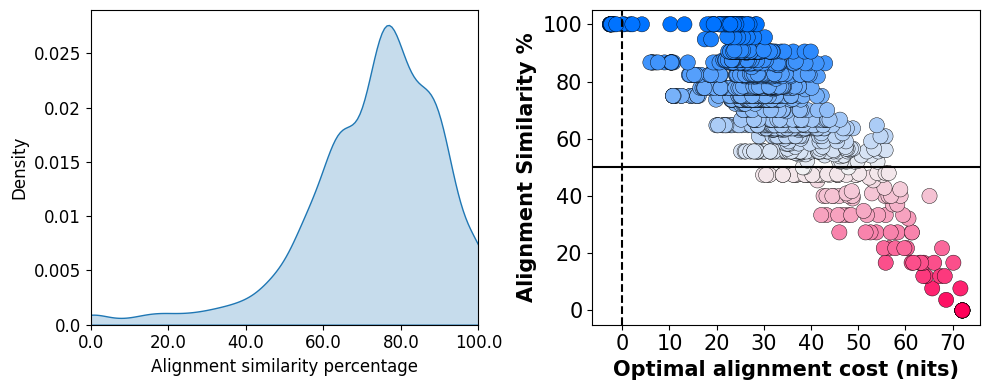

In [78]:
df = aligner_monocle.get_stat_df() 
# selecting reasonable thresholds by manual inspection to identify top/highly distant genes
# this call might sometime gives 'error sending list' from GSEAPy package function call -
#topDEgenes = df[np.logical_and(list(df['opt_alignment_cost'] >=50), list(df['alignment_similarity_percentage'] <=0.5))]['Gene']
topDEgenes = df[list(df['alignment_similarity_percentage'] <=0.4)]['Gene']
pathway_df = PathwayAnalyserV2.run_overrepresentation_analysis(topDEgenes) # this is a wrapper function call for GSEAPy enrichr inferface
pathway_df

In [21]:
adata_ref.obs['time']  = adata_ref.obs['palantir_pseudotime']
adata_query.obs['time']  = adata_query.obs['palantir_pseudotime']

print( np.min(adata_ref.obs.time) , np.max(adata_ref.obs.time) ) 
print( np.min(adata_query.obs.time) , np.max(adata_query.obs.time) ) 

adata_ref.obs['time'] = TimeSeriesPreprocessor.Utils.minmax_normalise(np.asarray(adata_ref.obs['time']))
adata_query.obs['time'] = TimeSeriesPreprocessor.Utils.minmax_normalise(np.asarray(adata_query.obs['time']))

print( np.min(adata_ref.obs.time) , np.max(adata_ref.obs.time) ) 
print( np.min(adata_query.obs.time) , np.max(adata_query.obs.time) ) 

0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0


# trying max n points for optimal binning = 14
Optimal equal number of bins for R and Q =  14


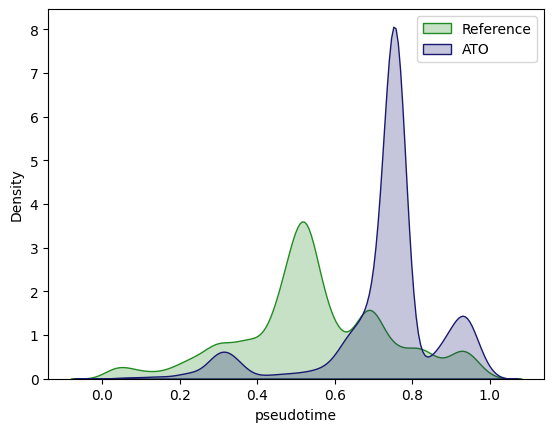

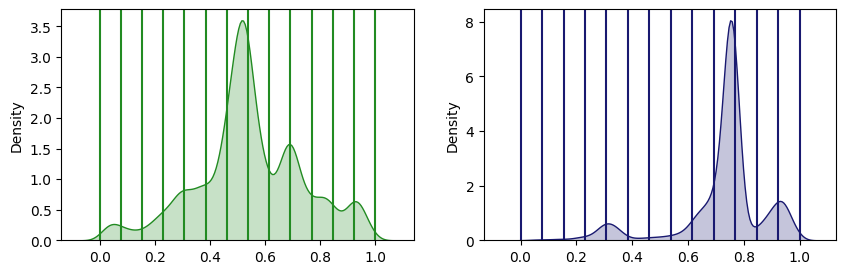

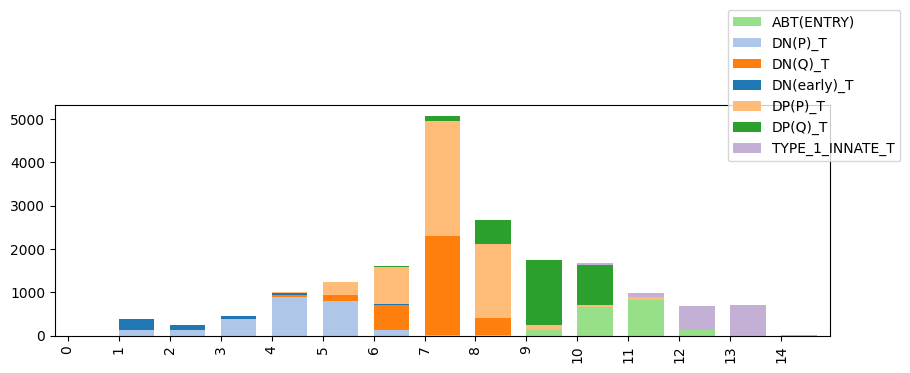

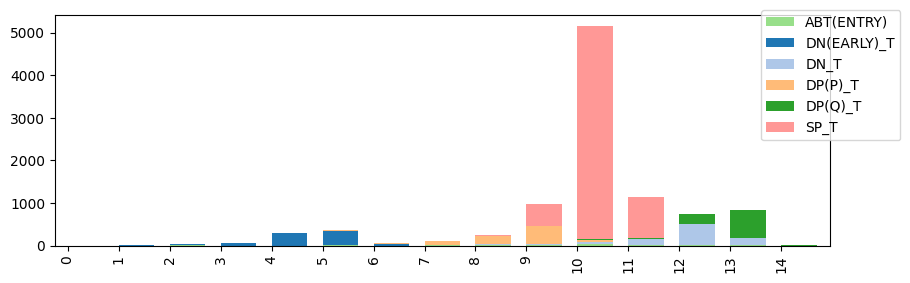

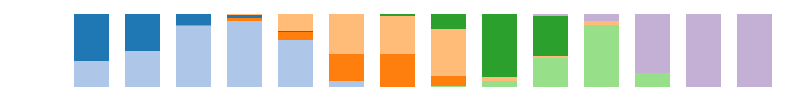

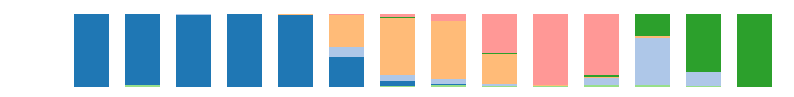

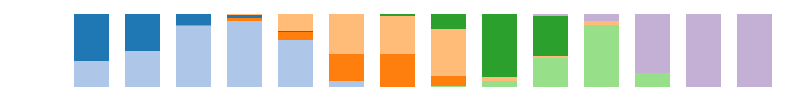

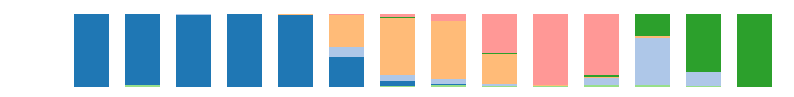

In [22]:
# Examine ref and query pseudotime distributions
sb.kdeplot(adata_ref.obs['time'], fill=True, label='Reference', color='forestgreen') 
sb.kdeplot(adata_query.obs['time'], fill=True, label='ATO', color='midnightblue'); plt.xlabel('pseudotime'); plt.legend()
plt.savefig('revision_figs/refato_different_pseudotime_estimators/palantir_dists.png')


joint_cmap = {'IPSC': '#c7c7c7',
'PRIMITIVE_STREAK': '#9edae5',
'MESODERMAL_PROGENITOR': '#dbdb8d',
'ENDOTHELIUM': '#17becf',
'HSC_MPP': '#f7b6d2',
'HSC_MPP/LMPP_MLP/DC2': '#8c564b',
'LMPP_MLP': '#8c564b',
'CYCLING_MPP': '#e377c2',
'DN(EARLY)_T': '#1f77b4',
'DN(early)_T': '#1f77b4',
'DN_T': '#aec7e8',
'DN(P)_T': '#aec7e8',
'DN(Q)_T': '#ff7f0e',
'DP(P)_T': '#ffbb78',
'DP(Q)_T': '#2ca02c',
'ABT(ENTRY)': '#98df8a',
'SP_T': '#ff9896',
'TYPE_1_INNATE_T': '#c5b0d5'}

# We find 13 to be the size of the optimal binning
vs = VisualUtils.VisualUtils.get_celltype_composition_across_time(adata_ref, adata_query, 
                                                              n_points=14, ANNOTATION_COLNAME='ANNOTATION_COMB', 
                                                              optimal_binning=False,
                                                             ref_cmap=joint_cmap, query_cmap=joint_cmap, plot_celltype_counts=True)
vs.metaS.apply(lambda x: x*100/sum(x), axis=1).plot(kind='bar',stacked=True,color=joint_cmap, grid = False, legend=False, width=0.7,align='edge',figsize=(10,1))
plt.axis('off')
plt.savefig('revision_figs/refato_different_pseudotime_estimators/palantir_ref_timebins.pdf')
vs.metaT.apply(lambda x: x*100/sum(x), axis=1).plot(kind='bar',stacked=True,color=joint_cmap, grid = False, legend=False, width=0.7,align='edge',figsize=(10,1))
plt.axis('off')
plt.savefig('revision_figs/refato_different_pseudotime_estimators/palantir_ato_timebins.pdf')



0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0


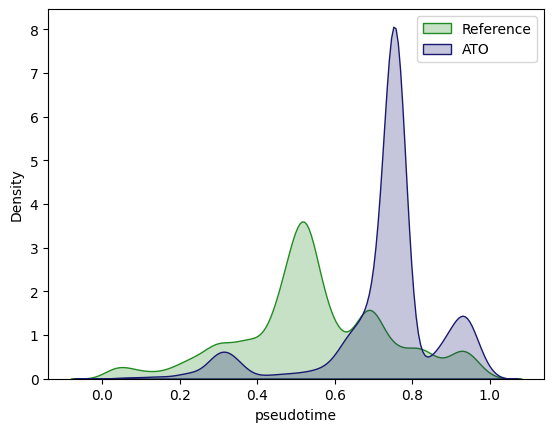

# trying max n points for optimal binning = 14
Optimal equal number of bins for R and Q =  14
WINDOW_SIZE= 0.1


  0%|          | 0/1220 [00:00<?, ?it/s]

Average Alignment:  IIIDIDMMMMMMMMMMWW


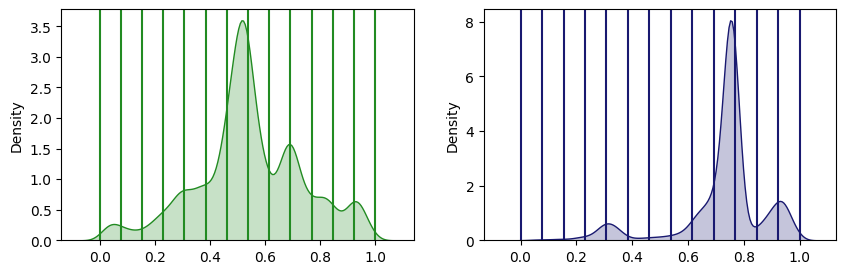

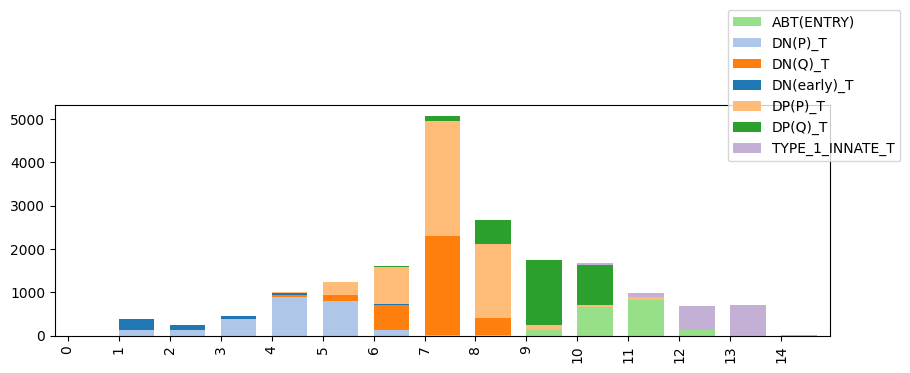

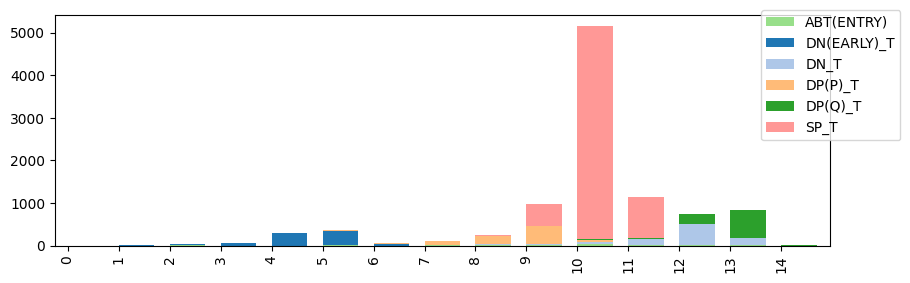

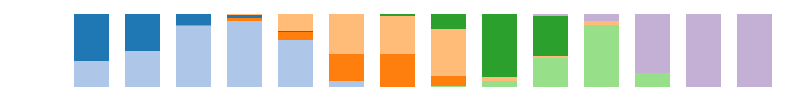

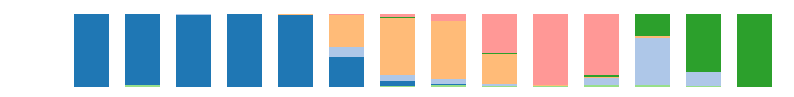

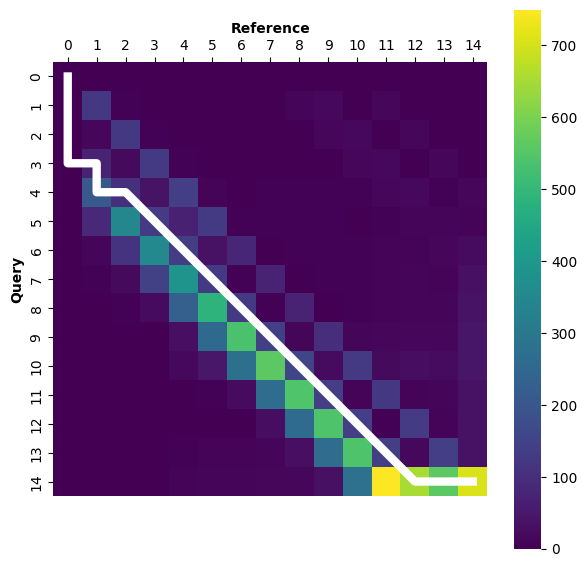

In [75]:
adata_ref.obs['time']  = adata_ref.obs['palantir_pseudotime']
adata_query.obs['time']  = adata_query.obs['palantir_pseudotime']

print( np.min(adata_ref.obs.time) , np.max(adata_ref.obs.time) ) 
print( np.min(adata_query.obs.time) , np.max(adata_query.obs.time) ) 

adata_ref.obs['time'] = TimeSeriesPreprocessor.Utils.minmax_normalise(np.asarray(adata_ref.obs['time']))
adata_query.obs['time'] = TimeSeriesPreprocessor.Utils.minmax_normalise(np.asarray(adata_query.obs['time']))

print( np.min(adata_ref.obs.time) , np.max(adata_ref.obs.time) ) 
print( np.min(adata_query.obs.time) , np.max(adata_query.obs.time) ) 

# Examine ref and query pseudotime distributions
sb.kdeplot(adata_ref.obs['time'], fill=True, label='Reference', color='forestgreen') 
sb.kdeplot(adata_query.obs['time'], fill=True, label='ATO', color='midnightblue'); plt.xlabel('pseudotime'); plt.legend()
plt.show()

joint_cmap = {'IPSC': '#c7c7c7',
'PRIMITIVE_STREAK': '#9edae5',
'MESODERMAL_PROGENITOR': '#dbdb8d',
'ENDOTHELIUM': '#17becf',
'HSC_MPP': '#f7b6d2',
'HSC_MPP/LMPP_MLP/DC2': '#8c564b',
'LMPP_MLP': '#8c564b',
'CYCLING_MPP': '#e377c2',
'DN(EARLY)_T': '#1f77b4',
'DN(early)_T': '#1f77b4',
'DN_T': '#aec7e8',
'DN(P)_T': '#aec7e8',
'DN(Q)_T': '#ff7f0e',
'DP(P)_T': '#ffbb78',
'DP(Q)_T': '#2ca02c',
'ABT(ENTRY)': '#98df8a',
'SP_T': '#ff9896',
'TYPE_1_INNATE_T': '#c5b0d5'}

# We find 13 to be the size of the optimal binning
vs = VisualUtils.VisualUtils.get_celltype_composition_across_time(adata_ref, adata_query, 
                                                              n_points=14, ANNOTATION_COLNAME='ANNOTATION_COMB', 
                                                              optimal_binning=False,
                                                             ref_cmap=joint_cmap, query_cmap=joint_cmap, plot_celltype_counts=True)
#vs.metaS.apply(lambda x: x*100/sum(x), axis=1).plot(kind='bar',stacked=True,color=joint_cmap, grid = False, legend=False, width=0.7,align='edge',figsize=(10,1))
#plt.axis('off')
#plt.savefig('plots/Fig6/ref_timebins.pdf')
#vs.metaT.apply(lambda x: x*100/sum(x), axis=1).plot(kind='bar',stacked=True,color=joint_cmap, grid = False, legend=False, width=0.7,align='edge',figsize=(10,1))
#plt.axis('off')
#plt.savefig('plots/Fig6/ato_timebins.pdf')

# RUN G2G ALIGNMENT

gene_list = human_TFs
aligner = Main.RefQueryAligner(adata_ref, adata_query, gene_list, len(vs.optimal_bining_S))
aligner.WEIGHT_BY_CELL_DENSITY = True
aligner.WINDOW_SIZE=0.1
aligner.state_params = [0.99,0.1,0.7]
aligner.optimal_binning = True
aligner.opt_binning_S = vs.optimal_bining_S
aligner.opt_binning_T = vs.optimal_bining_T
aligner.align_all_pairs()
#pickle.dump(aligner, open('../GOOGLE_DRIVE_MOUNT/G2G_Analysis/G2G_paper_related/aligner_TF_SPTDNonwards.pkl', 'wb')) 
aligner.get_aggregate_alignment()

In [76]:
aligner_palantir = aligner

mean matched percentage: 
60.209999999999994 %


Gene_set                                               Term  \
0   MSigDB_Hallmark_2020                      TNF-alpha Signaling via NF-kB   
40       KEGG_2021_Human                   Herpes simplex virus 1 infection   
41       KEGG_2021_Human            Transcriptional misregulation in cancer   
44       KEGG_2021_Human                          Th17 cell differentiation   
42       KEGG_2021_Human            Human T-cell leukemia virus 1 infection   
43       KEGG_2021_Human                                        Hepatitis B   
45       KEGG_2021_Human                         Osteoclast differentiation   
46       KEGG_2021_Human  Parathyroid hormone synthesis, secretion and a...   
48       KEGG_2021_Human                   Th1 and Th2 cell differentiation   
47       KEGG_2021_Human                                Cellular senescence   
49       KEGG_2021_Human                               Viral carcinogenesis   
50       KEGG_2021_Human                              Amphetamine addiction   
1   MSigDB_Hallmark_2020                               IL-2/STAT5 Signaling   
2   MSigDB_Hallmark_2020                                            Hypoxia   
51       KEGG_2021_Human                                  Cocaine addiction   
52       KEGG_2021_Human                              TNF signaling pathway   
53       KEGG_2021_Human                         Inflammatory bowel disease   
54       KEGG_2021_Human           C-type lectin receptor signaling pathway   
55       KEGG_2021_Human                            Chemical carcinogenesis   
56       KEGG_2021_Human     Growth hormone synthesis, secretion and action   
3   MSigDB_Hallmark_2020                                        p53 Pathway   
4   MSigDB_Hallmark_2020                                     UV Response Up   
57       KEGG_2021_Human                            IL-17 signaling pathway   
59       KEGG_2021_Human                Aldosterone synthesis and secretion   
58       KEGG_2021_Human                                    Prostate cancer   
60       KEGG_2021_Human                   Cortisol synthesis and secretion   

   Overlap       P-value  Adjusted P-value  Old P-value  Old Adjusted P-value  \
0   27/200  9.971482e-21      3.988593e-19            0                     0   
40  35/498  2.969590e-17      3.771380e-15            0                     0   
41  16/192  1.477096e-09      9.379557e-08            0                     0   
44  10/107  6.516903e-07      1.655293e-05            0                     0   
42  14/219  4.365630e-07      1.655293e-05            0                     0   
43  12/162  6.227471e-07      1.655293e-05            0                     0   
45   9/127  2.303546e-05      4.875838e-04            0                     0   
46   8/106  4.197008e-05      7.614571e-04            0                     0   
48    7/92  1.209413e-04      1.706616e-03            0                     0   
47   9/156  1.147569e-04      1.706616e-03            0                     0   
49  10/203  1.781403e-04      2.064688e-03            0                     0   
50    6/69  1.788313e-04      2.064688e-03            0                     0   
1   10/199  1.514944e-04      2.104241e-03            0                     0   
2   10/200  1.578181e-04      2.104241e-03            0                     0   
51    5/49  2.959071e-04      3.131684e-03            0                     0   
52   7/112  4.085142e-04      3.990870e-03            0                     0   
53    5/65  1.097295e-03      9.954036e-03            0                     0   
54   6/104  1.598996e-03      1.353817e-02            0                     0   
55   9/239  2.466466e-03      1.957758e-02            0                     0   
56   6/119  3.153176e-03      2.355608e-02            0                     0   
3    8/200  2.936883e-03      2.420217e-02            0                     0   
4    7/158  3.025272e-03      2.420217e-02            0                     0   
57    5/94  5.51219

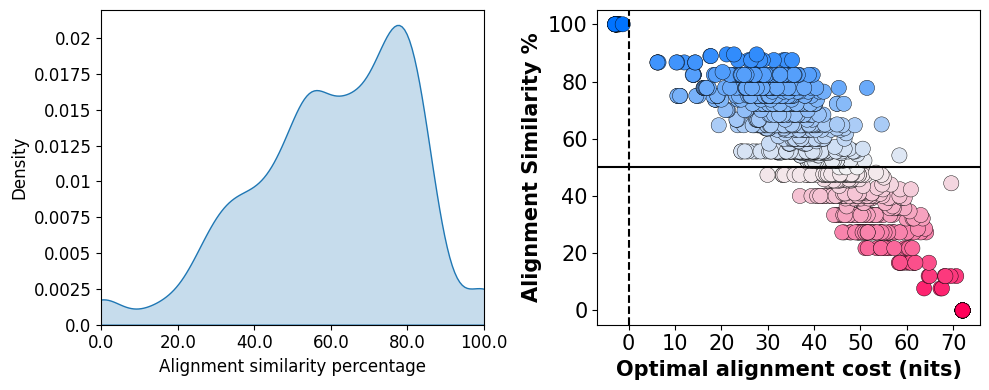

In [77]:
df = aligner_palantir.get_stat_df() 
# selecting reasonable thresholds by manual inspection to identify top/highly distant genes
# this call might sometime gives 'error sending list' from GSEAPy package function call -
#topDEgenes = df[np.logical_and(list(df['opt_alignment_cost'] >=50), list(df['alignment_similarity_percentage'] <=0.5))]['Gene']
topDEgenes = df[list(df['alignment_similarity_percentage'] <=0.4)]['Gene']
pathway_df = PathwayAnalyserV2.run_overrepresentation_analysis(topDEgenes) # this is a wrapper function call for GSEAPy enrichr inferface
pathway_df

In [23]:
adata_ref.obs['time']  = adata_ref.obs['dpt_pseudotime']
adata_query.obs['time']  = adata_query.obs['dpt_pseudotime']

print( np.min(adata_ref.obs.time) , np.max(adata_ref.obs.time) ) 
print( np.min(adata_query.obs.time) , np.max(adata_query.obs.time) ) 

adata_ref.obs['time'] = TimeSeriesPreprocessor.Utils.minmax_normalise(np.asarray(adata_ref.obs['time']))
adata_query.obs['time'] = TimeSeriesPreprocessor.Utils.minmax_normalise(np.asarray(adata_query.obs['time']))

print( np.min(adata_ref.obs.time) , np.max(adata_ref.obs.time) ) 
print( np.min(adata_query.obs.time) , np.max(adata_query.obs.time) ) 


0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0


# trying max n points for optimal binning = 14
Optimal equal number of bins for R and Q =  14


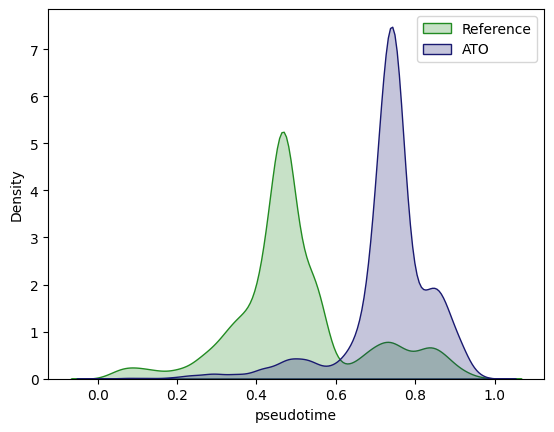

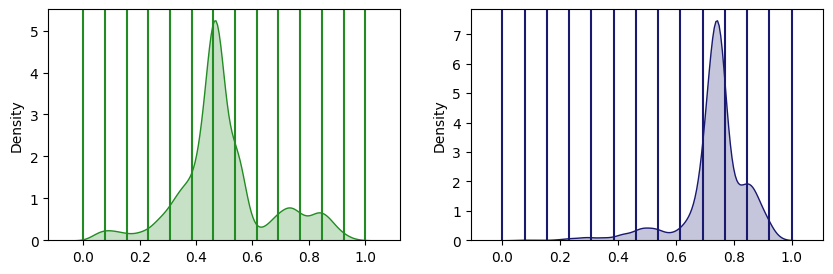

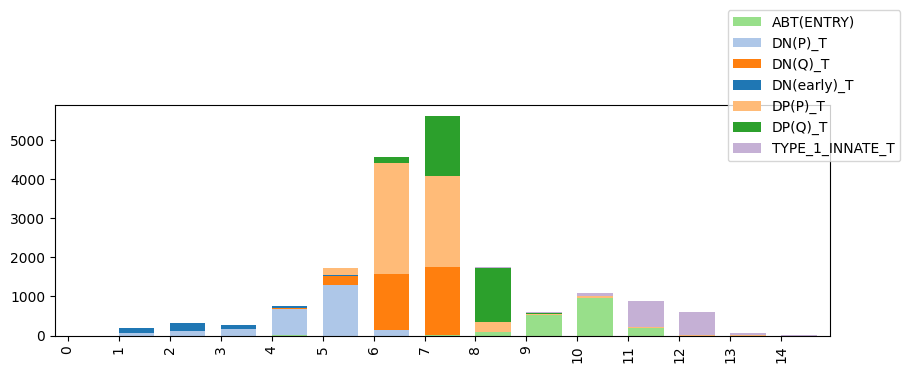

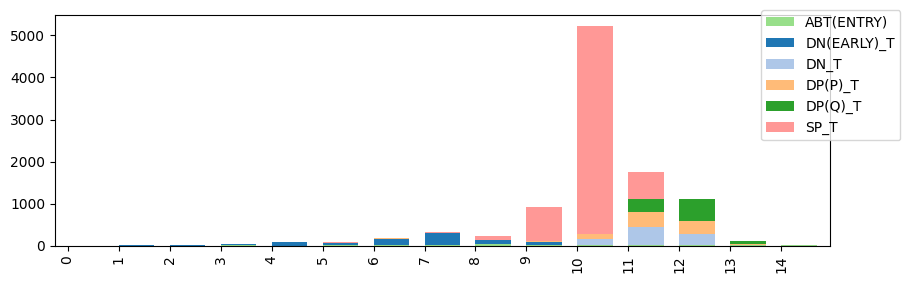

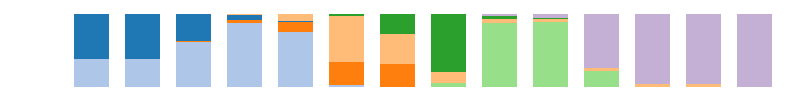

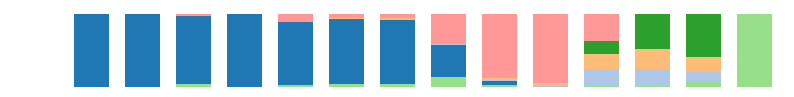

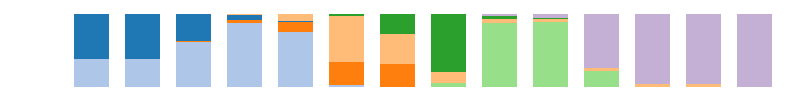

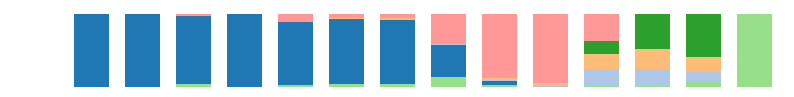

In [24]:
# Examine ref and query pseudotime distributions
sb.kdeplot(adata_ref.obs['time'], fill=True, label='Reference', color='forestgreen') 
sb.kdeplot(adata_query.obs['time'], fill=True, label='ATO', color='midnightblue'); plt.xlabel('pseudotime'); plt.legend()
plt.savefig('revision_figs/refato_different_pseudotime_estimators/dpt_dists.png')


joint_cmap = {'IPSC': '#c7c7c7',
'PRIMITIVE_STREAK': '#9edae5',
'MESODERMAL_PROGENITOR': '#dbdb8d',
'ENDOTHELIUM': '#17becf',
'HSC_MPP': '#f7b6d2',
'HSC_MPP/LMPP_MLP/DC2': '#8c564b',
'LMPP_MLP': '#8c564b',
'CYCLING_MPP': '#e377c2',
'DN(EARLY)_T': '#1f77b4',
'DN(early)_T': '#1f77b4',
'DN_T': '#aec7e8',
'DN(P)_T': '#aec7e8',
'DN(Q)_T': '#ff7f0e',
'DP(P)_T': '#ffbb78',
'DP(Q)_T': '#2ca02c',
'ABT(ENTRY)': '#98df8a',
'SP_T': '#ff9896',
'TYPE_1_INNATE_T': '#c5b0d5'}

# We find 13 to be the size of the optimal binning
vs = VisualUtils.VisualUtils.get_celltype_composition_across_time(adata_ref, adata_query, 
                                                              n_points=14, ANNOTATION_COLNAME='ANNOTATION_COMB', 
                                                              optimal_binning=False,
                                                             ref_cmap=joint_cmap, query_cmap=joint_cmap, plot_celltype_counts=True)
vs.metaS.apply(lambda x: x*100/sum(x), axis=1).plot(kind='bar',stacked=True,color=joint_cmap, grid = False, legend=False, width=0.7,align='edge',figsize=(10,1))
plt.axis('off')
plt.savefig('revision_figs/refato_different_pseudotime_estimators/dpt_ref_timebins.pdf')
vs.metaT.apply(lambda x: x*100/sum(x), axis=1).plot(kind='bar',stacked=True,color=joint_cmap, grid = False, legend=False, width=0.7,align='edge',figsize=(10,1))
plt.axis('off')
plt.savefig('revision_figs/refato_different_pseudotime_estimators/dpt_ato_timebins.pdf')



0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0


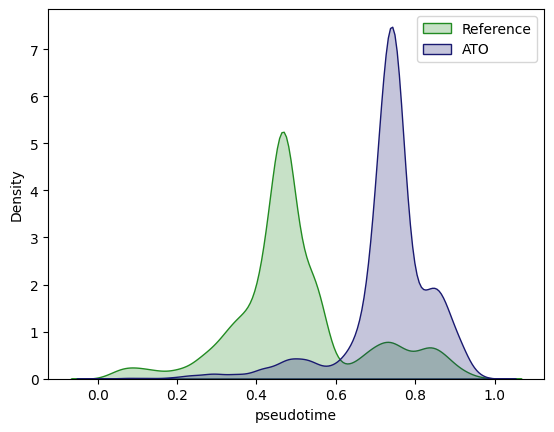

# trying max n points for optimal binning = 14
Optimal equal number of bins for R and Q =  14
WINDOW_SIZE= 0.1


  0%|          | 0/1220 [00:00<?, ?it/s]

Average Alignment:  IIIDIDIDIMMMMMMMMDDD


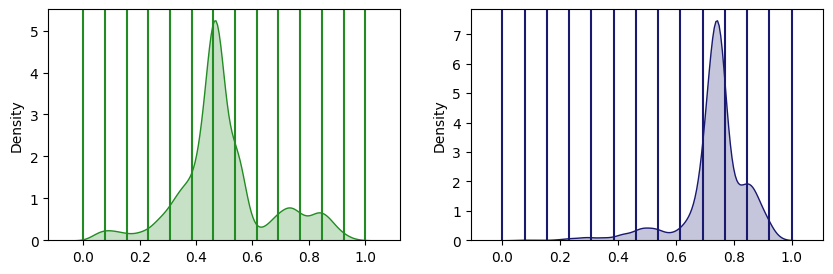

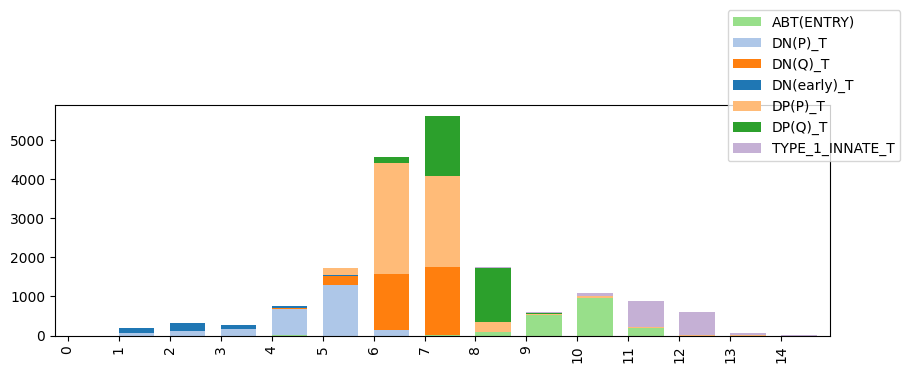

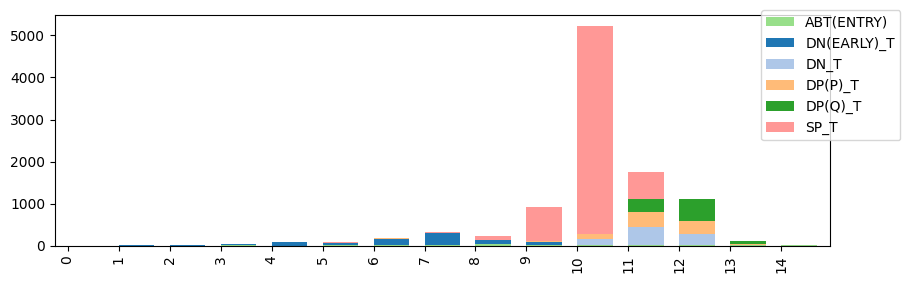

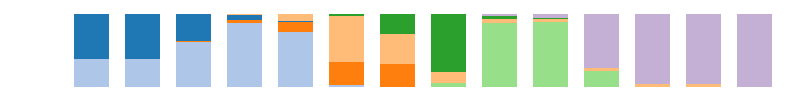

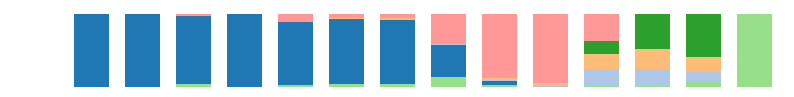

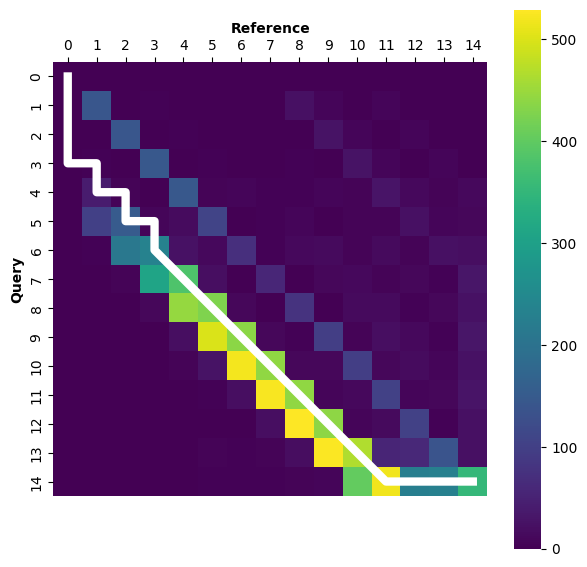

In [79]:
adata_ref.obs['time']  = adata_ref.obs['dpt_pseudotime']
adata_query.obs['time']  = adata_query.obs['dpt_pseudotime']

print( np.min(adata_ref.obs.time) , np.max(adata_ref.obs.time) ) 
print( np.min(adata_query.obs.time) , np.max(adata_query.obs.time) ) 

adata_ref.obs['time'] = TimeSeriesPreprocessor.Utils.minmax_normalise(np.asarray(adata_ref.obs['time']))
adata_query.obs['time'] = TimeSeriesPreprocessor.Utils.minmax_normalise(np.asarray(adata_query.obs['time']))

print( np.min(adata_ref.obs.time) , np.max(adata_ref.obs.time) ) 
print( np.min(adata_query.obs.time) , np.max(adata_query.obs.time) ) 

# Examine ref and query pseudotime distributions
sb.kdeplot(adata_ref.obs['time'], fill=True, label='Reference', color='forestgreen') 
sb.kdeplot(adata_query.obs['time'], fill=True, label='ATO', color='midnightblue'); plt.xlabel('pseudotime'); plt.legend()
plt.show()

joint_cmap = {'IPSC': '#c7c7c7',
'PRIMITIVE_STREAK': '#9edae5',
'MESODERMAL_PROGENITOR': '#dbdb8d',
'ENDOTHELIUM': '#17becf',
'HSC_MPP': '#f7b6d2',
'HSC_MPP/LMPP_MLP/DC2': '#8c564b',
'LMPP_MLP': '#8c564b',
'CYCLING_MPP': '#e377c2',
'DN(EARLY)_T': '#1f77b4',
'DN(early)_T': '#1f77b4',
'DN_T': '#aec7e8',
'DN(P)_T': '#aec7e8',
'DN(Q)_T': '#ff7f0e',
'DP(P)_T': '#ffbb78',
'DP(Q)_T': '#2ca02c',
'ABT(ENTRY)': '#98df8a',
'SP_T': '#ff9896',
'TYPE_1_INNATE_T': '#c5b0d5'}

# We find 13 to be the size of the optimal binning
vs = VisualUtils.VisualUtils.get_celltype_composition_across_time(adata_ref, adata_query, 
                                                              n_points=14, ANNOTATION_COLNAME='ANNOTATION_COMB', 
                                                              optimal_binning=False,
                                                             ref_cmap=joint_cmap, query_cmap=joint_cmap, plot_celltype_counts=True)
#vs.metaS.apply(lambda x: x*100/sum(x), axis=1).plot(kind='bar',stacked=True,color=joint_cmap, grid = False, legend=False, width=0.7,align='edge',figsize=(10,1))
#plt.axis('off')
#plt.savefig('plots/Fig6/ref_timebins.pdf')
#vs.metaT.apply(lambda x: x*100/sum(x), axis=1).plot(kind='bar',stacked=True,color=joint_cmap, grid = False, legend=False, width=0.7,align='edge',figsize=(10,1))
#plt.axis('off')
#plt.savefig('plots/Fig6/ato_timebins.pdf')

# RUN G2G ALIGNMENT

gene_list = human_TFs
aligner = Main.RefQueryAligner(adata_ref, adata_query, gene_list, len(vs.optimal_bining_S))
aligner.WEIGHT_BY_CELL_DENSITY = True
aligner.WINDOW_SIZE=0.1
aligner.state_params = [0.99,0.1,0.7]
aligner.optimal_binning = True
aligner.opt_binning_S = vs.optimal_bining_S
aligner.opt_binning_T = vs.optimal_bining_T
aligner.align_all_pairs()
#pickle.dump(aligner, open('../GOOGLE_DRIVE_MOUNT/G2G_Analysis/G2G_paper_related/aligner_TF_SPTDNonwards.pkl', 'wb')) 
aligner.get_aggregate_alignment()

In [80]:
aligner_dpt = aligner 

mean matched percentage: 
49.27 %


Gene_set                                               Term  \
42       KEGG_2021_Human                   Herpes simplex virus 1 infection   
0   MSigDB_Hallmark_2020                      TNF-alpha Signaling via NF-kB   
43       KEGG_2021_Human            Transcriptional misregulation in cancer   
44       KEGG_2021_Human                                        Hepatitis B   
45       KEGG_2021_Human            Human T-cell leukemia virus 1 infection   
46       KEGG_2021_Human                          Th17 cell differentiation   
47       KEGG_2021_Human                                    Prostate cancer   
48       KEGG_2021_Human                             Acute myeloid leukemia   
49       KEGG_2021_Human                                Cellular senescence   
50       KEGG_2021_Human                               Viral carcinogenesis   
51       KEGG_2021_Human                         Osteoclast differentiation   
52       KEGG_2021_Human                   Th1 and Th2 cell differentiation   
53       KEGG_2021_Human    Kaposi sarcoma-associated herpesvirus infection   
54       KEGG_2021_Human                                  Cocaine addiction   
55       KEGG_2021_Human           C-type lectin receptor signaling pathway   
56       KEGG_2021_Human  Parathyroid hormone synthesis, secretion and a...   
57       KEGG_2021_Human                              TNF signaling pathway   
58       KEGG_2021_Human                    Human cytomegalovirus infection   
59       KEGG_2021_Human                         Inflammatory bowel disease   
60       KEGG_2021_Human                                 Pathways in cancer   
61       KEGG_2021_Human                              Amphetamine addiction   
62       KEGG_2021_Human                                 Insulin resistance   
63       KEGG_2021_Human  PD-L1 expression and PD-1 checkpoint pathway i...   
64       KEGG_2021_Human                                   Cushing syndrome   
65       KEGG_2021_Human                           Chronic myeloid leukemia   
66       KEGG_2021_Human                                      Breast cancer   
67       KEGG_2021_Human                            Chemical carcinogenesis   
68       KEGG_2021_Human                          Lipid and atherosclerosis   
69       KEGG_2021_Human     Growth hormone synthesis, secretion and action   
1   MSigDB_Hallmark_2020                               IL-2/STAT5 Signaling   
2   MSigDB_Hallmark_2020                                    G2-M Checkpoint   
70       KEGG_2021_Human                                         Cell cycle   
71       KEGG_2021_Human                       Longevity regulating pathway   
72       KEGG_2021_Human                       Epstein-Barr virus infection   
73       KEGG_2021_Human                  Non-alcoholic fatty liver disease   
74       KEGG_2021_Human                   Cortisol synthesis and secretion   
4   MSigDB_Hallmark_2020                          Interferon Gamma Response   
5   MSigDB_Hallmark_2020                         Wnt-beta Catenin Signaling   
3   MSigDB_Hallmark_2020                                            Hypoxia   
75       KEGG_2021_Human                                          Mitophagy   
76       KEGG_2021_Human                         cGMP-PKG signaling pathway   
77       KEGG_2021_Human                         Non-small cell lung cancer   
6   MSigDB_Hallmark_2020                          Unfolded Protein Response   
78       KEGG_2021_Human                Aldosterone synthesis and secretion   
79       KEGG_2021_Human                                  Pancreatic cancer   
80       KEGG_2021_Human  AGE-RAGE signaling pathway in diabetic complic...   
81       KEGG_2021_Human                             MAPK signaling pathway   
7   MSigDB_Hallmark_2020                                        p53 Pathway   
8   MSigDB_Hallmark_2020                                 TGF-beta Signaling   
82       KEGG_2021_Human                          Relaxin signalin

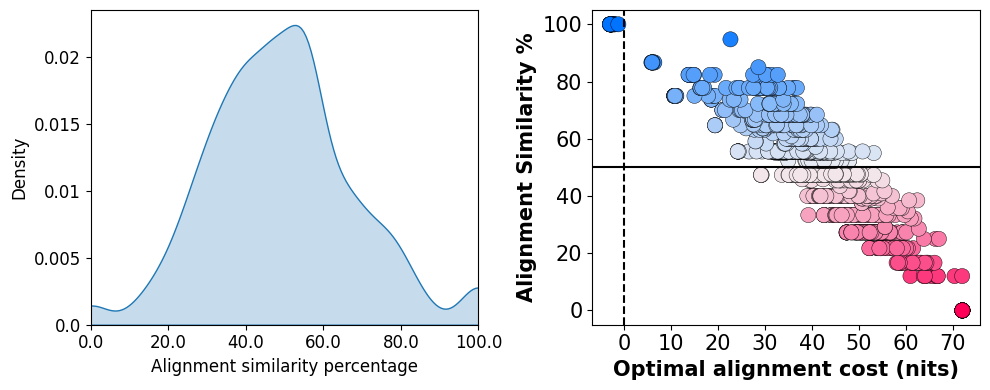

In [82]:
df = aligner_dpt.get_stat_df() 
# selecting reasonable thresholds by manual inspection to identify top/highly distant genes
# this call might sometime gives 'error sending list' from GSEAPy package function call -
#topDEgenes = df[np.logical_and(list(df['opt_alignment_cost'] >=50), list(df['alignment_similarity_percentage'] <=0.5))]['Gene']
topDEgenes = df[list(df['alignment_similarity_percentage'] <=0.4)]['Gene']
pathway_df = PathwayAnalyserV2.run_overrepresentation_analysis(topDEgenes) # this is a wrapper function call for GSEAPy enrichr inferface
pathway_df

In [84]:
adata_ref = adata_ref_original.copy()
adata_query = adata_query_original.copy()

0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0


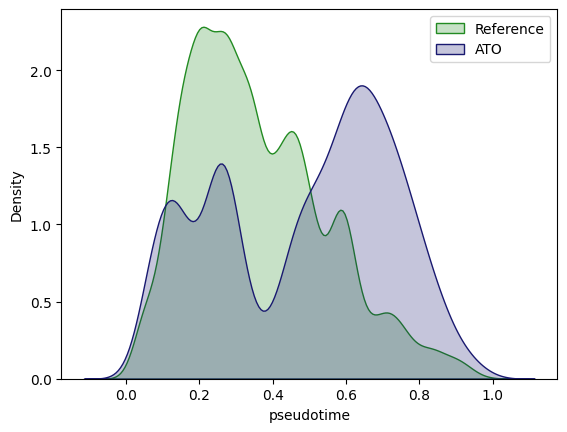

# trying max n points for optimal binning = 14
Optimal equal number of bins for R and Q =  14
WINDOW_SIZE= 0.1


  0%|          | 0/1220 [00:01<?, ?it/s]

Average Alignment:  MMMMMMMMIMMVMIDDD


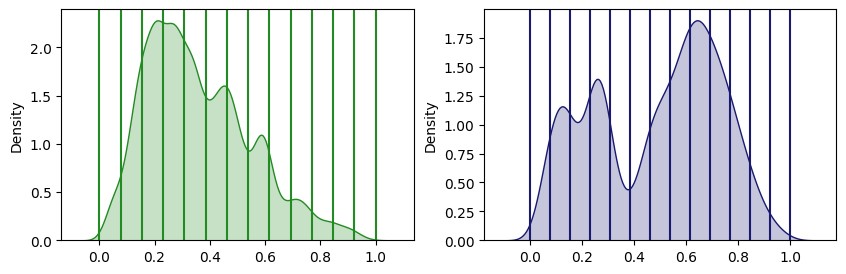

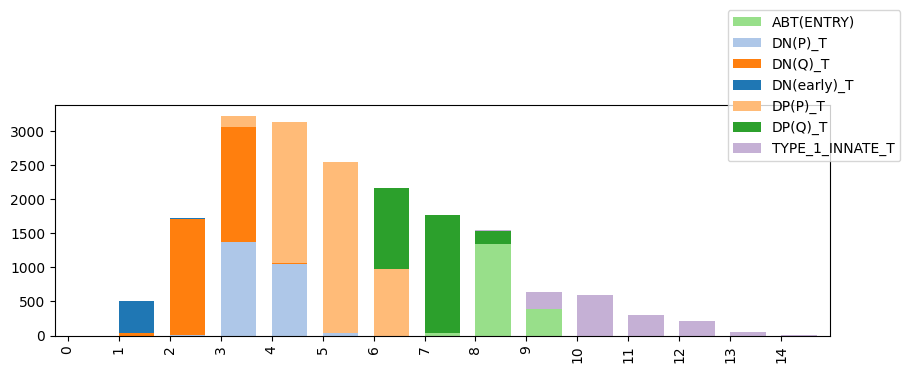

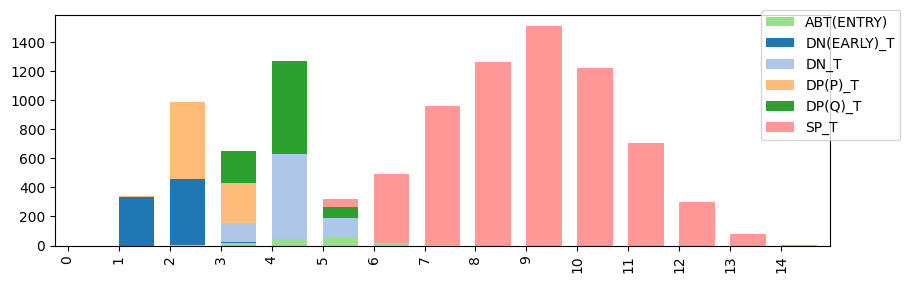

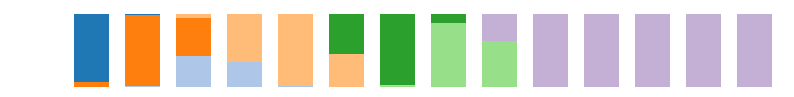

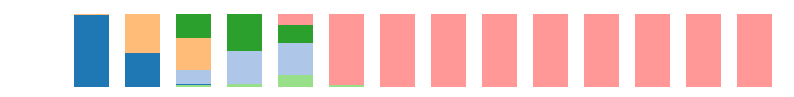

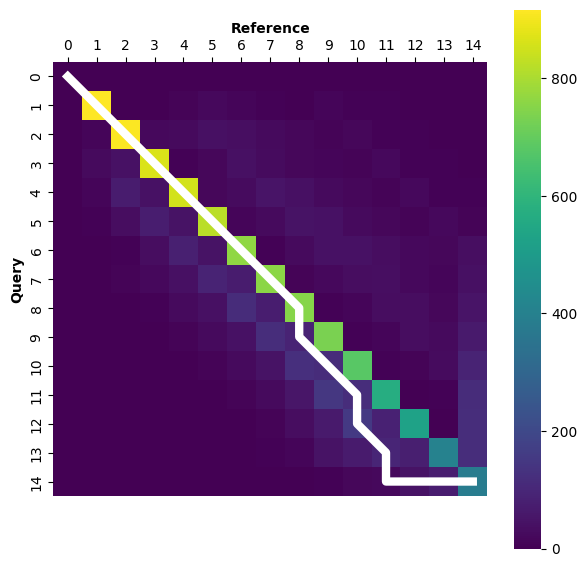

In [85]:
adata_ref = adata_ref_original.copy()
adata_query = adata_query_original.copy()

print( np.min(adata_ref.obs.time) , np.max(adata_ref.obs.time) ) 
print( np.min(adata_query.obs.time) , np.max(adata_query.obs.time) ) 

adata_ref.obs['time'] = TimeSeriesPreprocessor.Utils.minmax_normalise(np.asarray(adata_ref.obs['time']))
adata_query.obs['time'] = TimeSeriesPreprocessor.Utils.minmax_normalise(np.asarray(adata_query.obs['time']))

print( np.min(adata_ref.obs.time) , np.max(adata_ref.obs.time) ) 
print( np.min(adata_query.obs.time) , np.max(adata_query.obs.time) ) 

# Examine ref and query pseudotime distributions
sb.kdeplot(adata_ref.obs['time'], fill=True, label='Reference', color='forestgreen') 
sb.kdeplot(adata_query.obs['time'], fill=True, label='ATO', color='midnightblue'); plt.xlabel('pseudotime'); plt.legend()
plt.show()

joint_cmap = {'IPSC': '#c7c7c7',
'PRIMITIVE_STREAK': '#9edae5',
'MESODERMAL_PROGENITOR': '#dbdb8d',
'ENDOTHELIUM': '#17becf',
'HSC_MPP': '#f7b6d2',
'HSC_MPP/LMPP_MLP/DC2': '#8c564b',
'LMPP_MLP': '#8c564b',
'CYCLING_MPP': '#e377c2',
'DN(EARLY)_T': '#1f77b4',
'DN(early)_T': '#1f77b4',
'DN_T': '#aec7e8',
'DN(P)_T': '#aec7e8',
'DN(Q)_T': '#ff7f0e',
'DP(P)_T': '#ffbb78',
'DP(Q)_T': '#2ca02c',
'ABT(ENTRY)': '#98df8a',
'SP_T': '#ff9896',
'TYPE_1_INNATE_T': '#c5b0d5'}

# We find 13 to be the size of the optimal binning
vs = VisualUtils.VisualUtils.get_celltype_composition_across_time(adata_ref, adata_query, 
                                                              n_points=14, ANNOTATION_COLNAME='ANNOTATION_COMB', 
                                                              optimal_binning=False,
                                                             ref_cmap=joint_cmap, query_cmap=joint_cmap, plot_celltype_counts=True)
#vs.metaS.apply(lambda x: x*100/sum(x), axis=1).plot(kind='bar',stacked=True,color=joint_cmap, grid = False, legend=False, width=0.7,align='edge',figsize=(10,1))
#plt.axis('off')
#plt.savefig('plots/Fig6/ref_timebins.pdf')
#vs.metaT.apply(lambda x: x*100/sum(x), axis=1).plot(kind='bar',stacked=True,color=joint_cmap, grid = False, legend=False, width=0.7,align='edge',figsize=(10,1))
#plt.axis('off')
#plt.savefig('plots/Fig6/ato_timebins.pdf')

# RUN G2G ALIGNMENT

gene_list = human_TFs
aligner = Main.RefQueryAligner(adata_ref, adata_query, gene_list, len(vs.optimal_bining_S))
aligner.WEIGHT_BY_CELL_DENSITY = True
aligner.WINDOW_SIZE=0.1
aligner.state_params = [0.99,0.1,0.7]
aligner.optimal_binning = True
aligner.opt_binning_S = vs.optimal_bining_S
aligner.opt_binning_T = vs.optimal_bining_T
aligner.align_all_pairs()
#pickle.dump(aligner, open('../GOOGLE_DRIVE_MOUNT/G2G_Analysis/G2G_paper_related/aligner_TF_SPTDNonwards.pkl', 'wb')) 
aligner.get_aggregate_alignment()

In [86]:
aligner_gplvm = aligner